3. Predicción lineal en el Mercado de valores (6 puntos)

Se considera un problema en donde se emplearán filtros Wiener y filtros adaptativos para poder predecir el valor DJIA de la siguiente semana en base a los datos que se tengan del pasado. En base a esta predicción se simulará un experimento de ver cuánto podemos ganar con una iteración de predicciones hacia el futuro, durante el total de las 3652 semanas por partes. Solo es rentable invertir en la bolsa si el aumento en DJIA corresponde a (1 + 0.03)^(1/52) - 1, que corresponde a la tasa efectiva semanal un banco. De lo contrario, se buscará hacer crecer el dinero mediante un depósito bancario.

1. Grafique los datos del índice DJIA en escala lineal y logarítmica. Asumiendo que comenzaste con $1000 e invertiste todo tu dinero en la bolsa, ¿cuánto dinero tendrías al final del periodo de inversión equivalente a 3652 semanas? Si en vez pusieras todo tu dinero en el banco con un porcentaje de interés anual r (compuesto semanalmente), ¿cuál debería ser el valor de r para obtener una ganancia equivalente a la de invertir el dinero en la bolsa?

In [1655]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci

In [1656]:
x=np.loadtxt("djia.csv")
N=len(x)
print(N)

3652


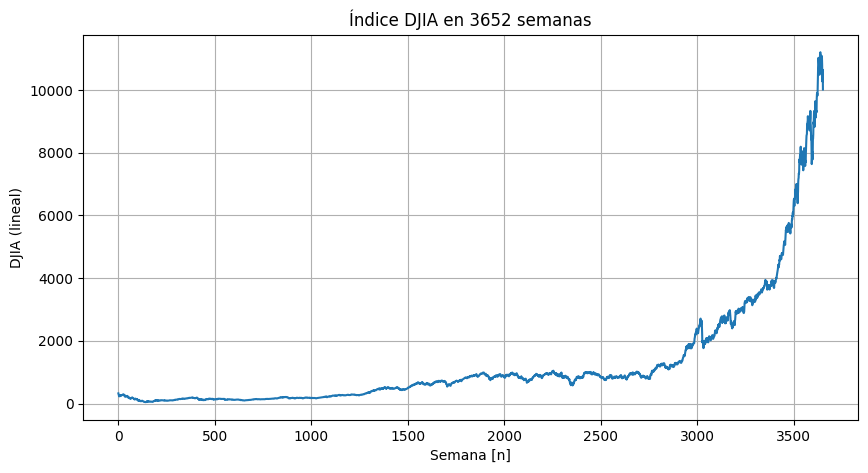

In [1657]:
plt.figure(figsize=(10,5))
plt.plot(x)
plt.title("Índice DJIA en 3652 semanas")
plt.xlabel("Semana [n]")
plt.ylabel("DJIA (lineal)")
plt.grid()
plt.show()

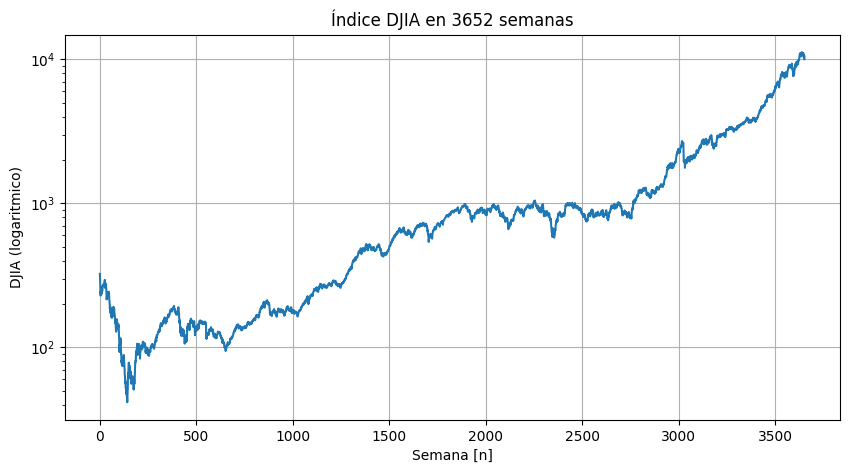

In [1658]:
plt.figure(figsize=(10,5))
plt.semilogy(x)
plt.title("Índice DJIA en 3652 semanas")
plt.xlabel("Semana [n]")
plt.ylabel("DJIA (logaritmico)")
plt.grid()
plt.show()

Para calcular la ganancia final obtenida al invertir todo el dinero en la bolsa se puede considerar únicamente el primer y último valor DJIA. Todos los demás valores van a ser simplificados naturalmente por cada semana.

In [1659]:
producto_final=x[-1]/x[0]
dinero=1000*producto_final

In [1660]:
print(f"El dinero actual después de invertir todo en la bolsa por 3652 semanas es de ${dinero}")

El dinero actual después de invertir todo en la bolsa por 3652 semanas es de $30934.578573633837


In [1661]:
#para hallar el valor de r de tasa efectiva semanal equivalente
tasa_efectiva_semanal=(dinero/1000)**(1/3652)-1
print(f"La tasa efectiva de rendimiento semanal equivalente es de {tasa_efectiva_semanal*100}%")
tasa_efectiva_anual=(1+tasa_efectiva_semanal)**(52)-1 #en un base al ejemplo mencionado se tiene que en un año hay 52 semanas
print(f"La tasa efectiva de rendimiento anual equivalente es de {tasa_efectiva_anual*100}%")

La tasa efectiva de rendimiento semanal equivalente es de 0.09401663800159277%
La tasa efectiva de rendimiento anual equivalente es de 5.0079299259235155%


2. Asumiendo que P = 3 y considerando la primera década de datos (520 semanas), utilice las ecuaciones del filtro óptimo Wiener para determinar los parámetros del filtro predictor del índice DJIA. Luego genere la secuencia x_prediccion[n] utilizando los coeficientes encontrados para la primera década de datos. Compare en un gráfico los valores predichos por el filtro Wiener y los valores reales del índice DJIA. Calcule el error cuadrático medio aplicando la fórmula presentada anteriormente y también aplicando las fórmulas del filtro Wiener y comente sus resultados.

Nota: Para la evaluación del filtro predictor construido en las nuevas muestras, se predecirá solo la muestra ubicada en un tiempo n+1, y después se cubrirá el valor de la muestra de este tiempo con el valor real para hacer la siguiente estimación n+2, y así sucesivamente.

Para estimar la predicción se tomará como entrada el valor actual (x[n]), y como salida el valor siguiente (x[n+1] = d[n]). Podemos aprovechar las funciones definidas en el anterior problema, y simplemente adaptar su uso.

In [1662]:
def filtro_wiener(x,P): #esta función sirve para calcular la autocorrelación para una señal, y expresarla en un formato matricial
    #Entradas
    #x: señal a calcular su matriz de autocorrelación
    #P: longitud del filtro para adaptar la matriz de autocorrelación
    N=len(x)
    r_x=np.zeros(P+1)
    for i in range(P+1):
        r_x[i]=np.mean(x[i:N]*x[:N-i])

    R_x=np.zeros((P,P))
    for i in range(P):
        for j in range(P):
            R_x[i,j]=r_x[np.abs(i-j)]

    r_x1x2=r_x[1:]
    return np.dot(np.linalg.inv(R_x),r_x1x2)

In [1663]:
P=3 #longitud propuesta para el filtro Wiener
n_semanas=520
entrada=x[:n_semanas] # x[n]
h_wiener=filtro_wiener(entrada,P)

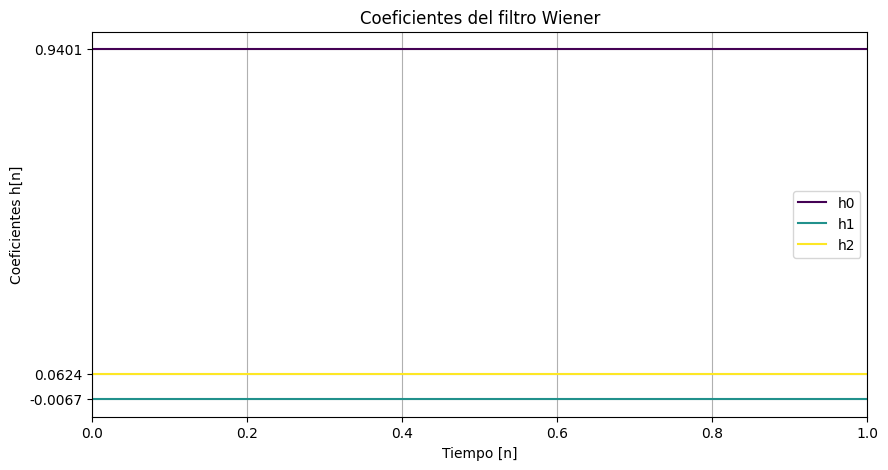

In [1664]:
import matplotlib.cm as cm
plt.figure(figsize=(10,5))

colors = cm.viridis(np.linspace(0, 1, len(h_wiener)))

for i, (coef, c) in enumerate(zip(h_wiener, colors)):
    plt.axhline(y=coef, linestyle='-', color=c, label=f'h{i}')

plt.yticks(h_wiener, [f"{coef:.4f}" for coef in h_wiener]) 

plt.title("Coeficientes del filtro Wiener")
plt.xlabel("Tiempo [n]")
plt.ylabel("Coeficientes h[n]")
plt.grid()
plt.legend()
plt.show()

Ahora, vamos a generar la secuencia completa considerando los coeficientes obtenidos para describir a esta primera decada de datos (520 semanas), pero ahora a partir del valor de P.

In [1665]:
import scipy as sci

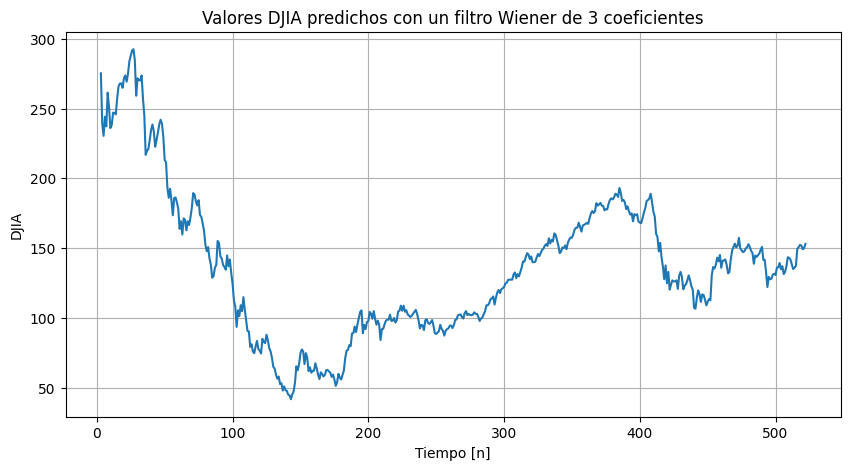

In [1666]:
x_n0=x[:n_semanas+P+1]
prediccion=sci.signal.lfilter(h_wiener,[1],x_n0)
prediccion=np.concat(([x_n0[0]],prediccion[:-1])) #desplazamos en una posición a los valores del arreglo, para que estén alineados con el vector x original.
rango_predicciones=np.arange(P,n_semanas+P)
plt.figure(figsize=(10,5))
plt.plot(rango_predicciones,prediccion[P:P+n_semanas])
plt.xlabel("Tiempo [n]")
plt.ylabel("DJIA")
plt.title(f"Valores DJIA predichos con un filtro Wiener de {P} coeficientes")
plt.grid()
plt.show()

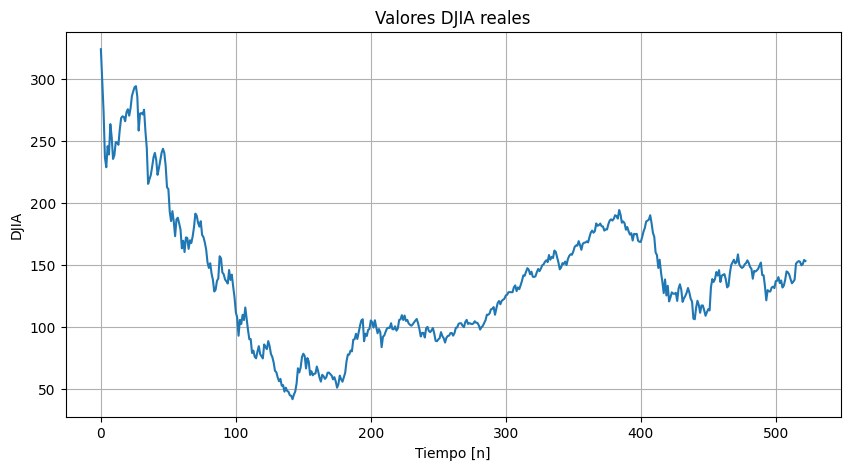

In [1667]:
plt.figure(figsize=(10,5))
plt.plot(x_n0[:P+n_semanas])
plt.xlabel("Tiempo [n]")
plt.ylabel("DJIA")
plt.title("Valores DJIA reales")
plt.grid()
plt.show()

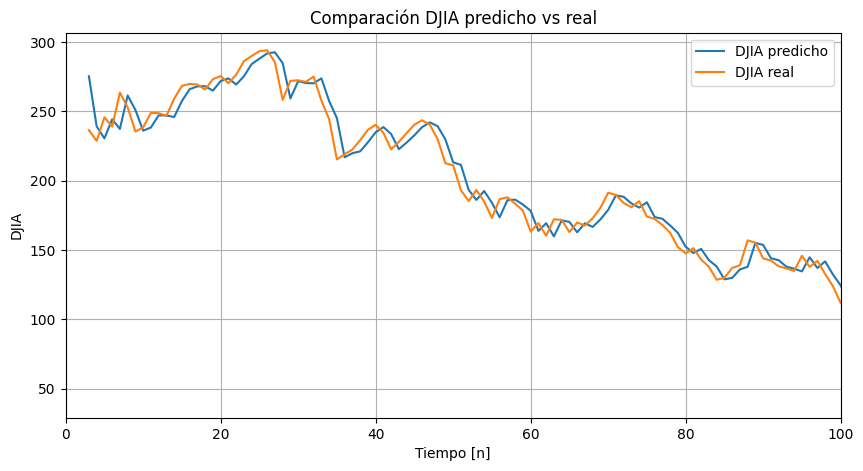

El error medio cuadrático promedio es de 37.188962104549
El error calculado con el método propuesto es de 37.216912133574425


In [1668]:
plt.figure(figsize=(10,5))
plt.plot(rango_predicciones,prediccion[P:P+n_semanas],label="DJIA predicho")
plt.plot(rango_predicciones,x_n0[P:P+n_semanas],label="DJIA real")
plt.xlabel("Tiempo [n]")
plt.xlim([0,100])
plt.ylabel("DJIA")
plt.title("Comparación DJIA predicho vs real")
plt.grid()
plt.legend()
plt.show()

error=prediccion[:P+n_semanas]-x_n0[:P+n_semanas]
#error teórico: Aquí no se cuenta el primer término ya que este en realidad nunca ha sido predicho
mse_wiener=np.mean(np.abs(prediccion[1:P+n_semanas]-x_n0[1:P+n_semanas])**2)
print(f"El error medio cuadrático promedio es de {mse_wiener}")

#error normalizado mediante la fórmula propuesta: Aquí solo se consideran los valores posteriores a la cantidad de términos que se usan para predecir un valor. En este caso P=3, y por lo tanto recién se puede comenzar a evaluar un error para los valores predichos en base a los 3 anteriores valores. Esto es, apartir del cuarto valor.
mse_propuesto=np.mean(np.abs(prediccion[P:P+n_semanas]-x_n0[P:P+n_semanas])**2)
print(f"El error calculado con el método propuesto es de {mse_propuesto}")

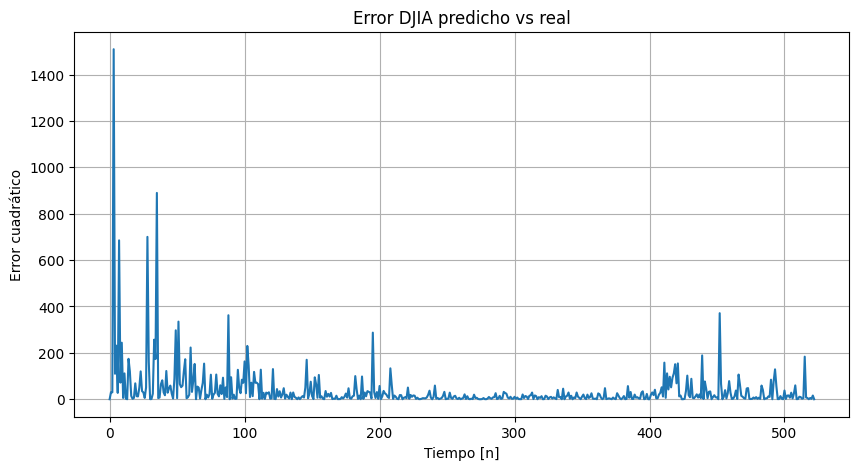

In [1669]:
plt.figure(figsize=(10,5))
plt.plot(error**2)
plt.xlabel("Tiempo [n]")
plt.ylabel("Error cuadrático")
plt.title("Error DJIA predicho vs real")
plt.grid()
plt.show()


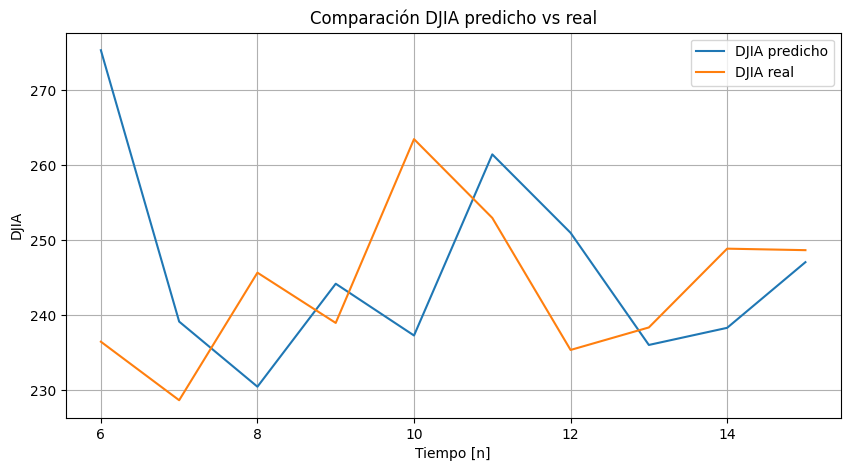

In [1670]:
plt.figure(figsize=(10,5))
plt.plot(rango_predicciones[P:P+n_semanas//50],prediccion[P:P+n_semanas//50],label="DJIA predicho")
plt.plot(rango_predicciones[P:P+n_semanas//50],x_n0[P:P+n_semanas//50],label="DJIA real")
plt.xlabel("Tiempo [n]")
plt.ylabel("DJIA")
plt.title("Comparación DJIA predicho vs real")
plt.grid()
plt.legend()
plt.show()

3. Considerando diferentes valores de P = 1,...,10, repita el paso anterior y calcule los coeficientes del filtro Wiener y su correspondiente error cuadrático medio de predicción. Presente en una tabla los valores de los coeficientes obtenidos en cada caso y grafique los errores en función del valor de P. ¿Cuál es el valor de P más apropiado? ¿Existe algún punto después del cual la disminución del error de predicción es despreciable? Justifique sus respuestas.

In [1671]:
lista_P=np.arange(1,11) #longitud propuesta para el filtro Wiener
n_semanas=520
minimo_mse=99999999
entrada=x[:n_semanas] # x[n]
mse=[]
for P in lista_P:
    h_wiener=filtro_wiener(entrada,P)
    x_n0=x[:n_semanas+P+1]
    prediccion=sci.signal.lfilter(h_wiener,[1],x_n0)
    prediccion=np.concat(([x_n0[0]],prediccion[:-1])) #desplazamos en una posición a los valores del arreglo, para que estén alineados con el vector x original.
    mse_propuesto=np.mean(np.abs(prediccion[P:P+n_semanas]-x_n0[P:P+n_semanas])**2)
    mse.append(mse_propuesto)
    print(f"Para P={P}, el error calculado con el método propuesto es de {mse_propuesto}")
    for i in range(len(h_wiener)):
        print(f"El valor del coeficiente N°{i} del filtro actual es: {h_wiener[i]}")
    if mse_propuesto<minimo_mse:
        h_wiener_ganador=h_wiener
        P_ganador=P

Para P=1, el error calculado con el método propuesto es de 38.502208322256735
El valor del coeficiente N°0 del filtro actual es: 0.9953581756568511
Para P=2, el error calculado con el método propuesto es de 37.909987752051414
El valor del coeficiente N°0 del filtro actual es: 0.9433823003648572
El valor del coeficiente N°1 del filtro actual es: 0.052218263297723284
Para P=3, el error calculado con el método propuesto es de 37.216912133574425
El valor del coeficiente N°0 del filtro actual es: 0.9401223885466548
El valor del coeficiente N°1 del filtro actual es: -0.006675750325736532
El valor del coeficiente N°2 del filtro actual es: 0.06242857598738465
Para P=4, el error calculado con el método propuesto es de 34.80907306527166
El valor del coeficiente N°0 del filtro actual es: 0.9321985922150162
El valor del coeficiente N°1 del filtro actual es: -0.005828425441251284
El valor del coeficiente N°2 del filtro actual es: -0.05689720096418682
El valor del coeficiente N°3 del filtro actual e

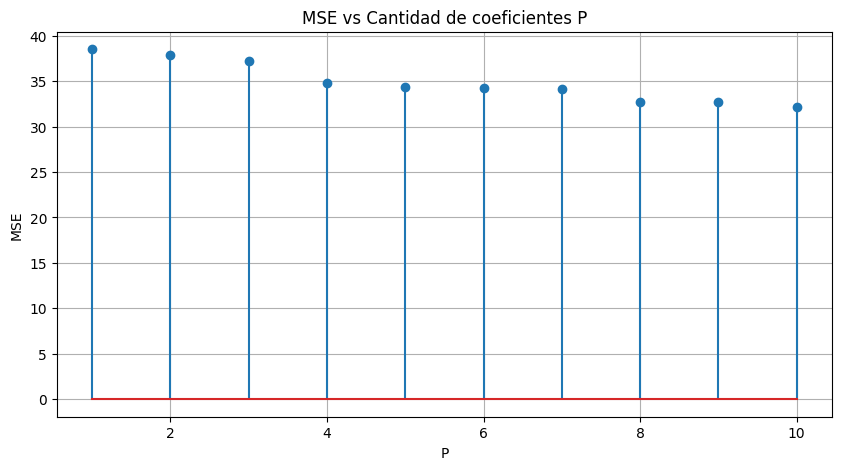

In [1672]:
plt.figure(figsize=(10,5))
plt.stem(np.arange(1,11),mse)
plt.xlabel("P")
plt.ylabel("MSE")
plt.title("MSE vs Cantidad de coeficientes P")
plt.grid()
plt.show()

In [1673]:
lista_P=np.arange(1,301) #longitud propuesta para el filtro Wiener
n_semanas=520
minimo_mse=99999999
mse=[]
entrada=x[:n_semanas] # x[n]
for P in lista_P:
    h_wiener=filtro_wiener(entrada,P)
    x_n0=x[:n_semanas+P+1]
    prediccion=sci.signal.lfilter(h_wiener,[1],x_n0)
    prediccion=np.concat(([x_n0[0]],prediccion[:-1])) #desplazamos en una posición a los valores del arreglo, para que estén alineados con el vector x original.
    mse_propuesto=np.mean(np.abs(prediccion[P:P+n_semanas]-x_n0[P:P+n_semanas])**2)
    mse.append(mse_propuesto)
    if mse_propuesto<minimo_mse:
        h_wiener_ganador=h_wiener
        P_ganador=P
        minimo_mse=mse_propuesto

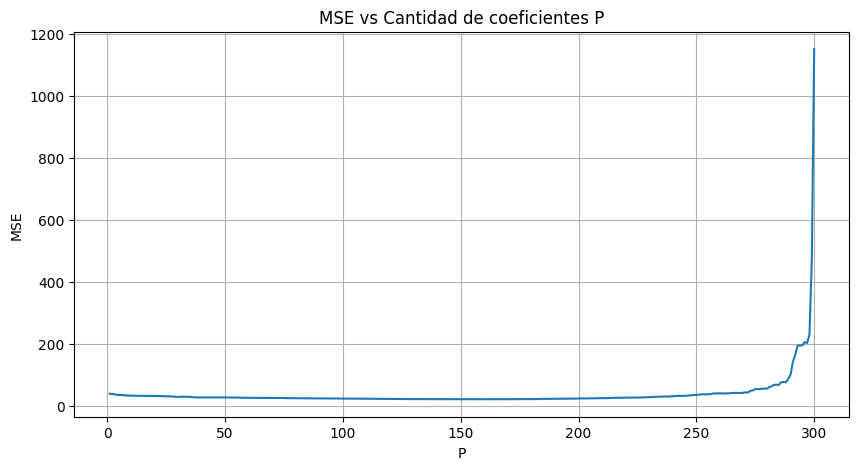

In [1674]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,301),mse)
plt.xlabel("P")
plt.ylabel("MSE")
plt.title("MSE vs Cantidad de coeficientes P")
plt.grid()
plt.show()

In [1675]:
print(P_ganador)
print(np.min(mse))

158
20.85489267711612


In [1676]:
print(mse)

[np.float64(38.502208322256735), np.float64(37.909987752051414), np.float64(37.216912133574425), np.float64(34.80907306527166), np.float64(34.371031789940446), np.float64(34.204601471618254), np.float64(34.1360739940884), np.float64(32.724884247727), np.float64(32.69861046770773), np.float64(32.1945514009101), np.float64(32.06334749758065), np.float64(31.990673991290638), np.float64(31.850043463567914), np.float64(31.796125501034883), np.float64(31.620244812124124), np.float64(31.565677003287504), np.float64(31.5091120505757), np.float64(31.558211353484644), np.float64(31.517916879422746), np.float64(31.2576158604557), np.float64(31.127283669699626), np.float64(30.965541577123222), np.float64(30.912021063632096), np.float64(30.638230543100278), np.float64(30.410436425050296), np.float64(30.07552058640428), np.float64(29.979887135570053), np.float64(29.685016375983135), np.float64(28.710608214254883), np.float64(28.37491280834119), np.float64(28.250747126023057), np.float64(29.188972598

Al aplicar el filtro Wiener para valores de orden P desde 1 hasta 10, observamos que el error cuadrático medio inicialmente disminuye, alcanzando su valor mínimo para P = 2. A partir de dicho punto, el error empieza a aumentar consistentemente. Esta tendencia indica que el modelo comienza a sobreajustarse a los datos de entrenamiento conforme se incrementa el número de coeficientes. El sobreajuste se hace evidente al observar la oscilación y crecimiento de magnitud de los coeficientes estimados. El valor del primer coeficiente es siempre dominante para todas las iteraciones de P. En P=2, se descubre que un segundo coeficiente permite mejorar ligeramente las predicciones. A partir de ahí, el error aumenta y el valor de los nuevos coeficientes es muy pequeño, y su inclusión solo hace que se pierda precisiónen la predicción. Por tanto, el valor más apropiado de P es 2, ya que permite una predicción eficiente y evita complejidad innecesaria del modelo.

4. Dado el predictor Wiener diseñado con la primera década de datos y considerando el orden P seleccionado en la parte 3, vamos a aplicar la estrategia de inversión definida anteriormente por una década: Para ello considere que tiene $1000 al final de la semana P y que va aplicar la estrategia en las siguientes 520 semanas. Grafique la evolución de su dinero durante las 520 semanas que aplicó la estrategia. Compare sus resultados con las siguientes situaciones (situaciones descritas abajo):

In [1677]:
#vamos a aplicar una simulación en base a los valores de las predicciones
P=10
n_semanas=520
entrada=x[:n_semanas] # x[n]
h_wiener=filtro_wiener(entrada,P)

x_n0=x[:n_semanas+P+1]
prediccion=sci.signal.lfilter(h_wiener,[1],x_n0)
prediccion=np.concat(([x_n0[0]],prediccion[:-1]))

prediccion_aux=prediccion[P:P+n_semanas] #x[n+1]
valor_real=x_n0[P-1:P+n_semanas]# x[n]

dinero_estrategia_wiener=np.concat(([1000],np.zeros(n_semanas)))

tasa_efectiva_banco_semanal=(1+0.03)**(1/52)-1

contador_predicciones_correctas_wiener=0
acumulador_perdidas_wiener=[]
acumulador_ganancias_wiener=[]
for i in range(n_semanas):
    valor_real_actual=valor_real[i]
    valor_predicho_siguienteSemana=prediccion_aux[i]
    valor_real_siguienteSemana=valor_real[i+1]
    factor_bolsa=valor_predicho_siguienteSemana/valor_real_actual
    factor_real=valor_real_siguienteSemana/valor_real_actual
    prediccion_correcta=(factor_bolsa>1+tasa_efectiva_banco_semanal and factor_real>1+tasa_efectiva_banco_semanal) or (factor_bolsa<1+tasa_efectiva_banco_semanal and factor_real<1+tasa_efectiva_banco_semanal)
    if factor_bolsa>1+tasa_efectiva_banco_semanal:
        dinero_estrategia_wiener[i+1]=dinero_estrategia_wiener[i]*valor_real_siguienteSemana/valor_real_actual
    else:
        dinero_estrategia_wiener[i+1]=dinero_estrategia_wiener[i]*(1+tasa_efectiva_banco_semanal)
    if prediccion_correcta:
        contador_predicciones_correctas_wiener+=1
        acumulador_ganancias_wiener.append(dinero_estrategia_wiener[i+1]-dinero_estrategia_wiener[i])
    else:
        acumulador_perdidas_wiener.append(dinero_estrategia_wiener[i]-dinero_estrategia_wiener[i+1])

tasa_equivalente_prediccion_anual_wiener=(dinero_estrategia_wiener[-1]/dinero_estrategia_wiener[0])**(52/n_semanas)-1
ganancias_promedio_wiener=np.mean(acumulador_ganancias_wiener)
perdidas_promedio_wiener=np.mean(acumulador_perdidas_wiener)
predicciones_correctas_wiener=contador_predicciones_correctas_wiener/n_semanas*100

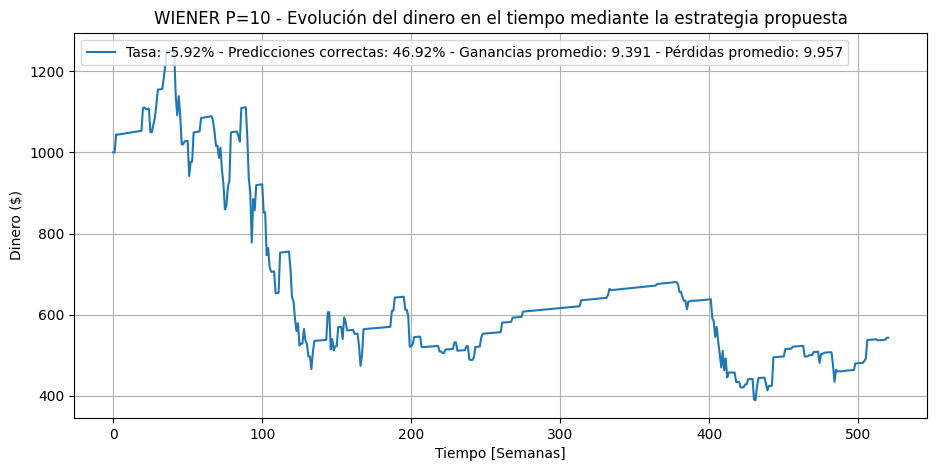

In [1678]:
plt.figure(figsize=(11,5))
plt.plot(dinero_estrategia_wiener,label=f"Tasa: {tasa_equivalente_prediccion_anual_wiener*100:.2f}% - Predicciones correctas: {predicciones_correctas_wiener:.2f}% - Ganancias promedio: {ganancias_promedio_wiener:.3f} - Pérdidas promedio: {perdidas_promedio_wiener:.3f}")
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title(f"WIENER P=10 - Evolución del dinero en el tiempo mediante la estrategia propuesta")
plt.grid()
plt.legend(loc="upper left")
plt.show()

Al ser la tasa de predicciones correctas menores a 50% y al ser el promedio de pérdidas por predicción fallida mayor al promedio de ganancias por predicción correcta, es normal esperar que el rendimiento final de la operación sea negativo.

a) Asumiendo que usted conoce exactamente la evolución del índice DJIA y aplica la estrategia de inversión.

In [1679]:
dinero_estrategia_ideal=np.concat(([1000],np.zeros(n_semanas)))

for i in range(n_semanas):
    valor_real_actual=valor_real[i]
    valor_real_siguienteSemana=valor_real[i+1]
    factor_bolsa=valor_real_siguienteSemana/valor_real_actual
    if factor_bolsa>(1+tasa_efectiva_banco_semanal):
        dinero_estrategia_ideal[i+1]=dinero_estrategia_ideal[i]*factor_bolsa
    else:
        dinero_estrategia_ideal[i+1]=dinero_estrategia_ideal[i]*(1+tasa_efectiva_banco_semanal)
tasa_equivalente_ideal_anual=(dinero_estrategia_ideal[-1]/dinero_estrategia_ideal[0])**(52/n_semanas)-1

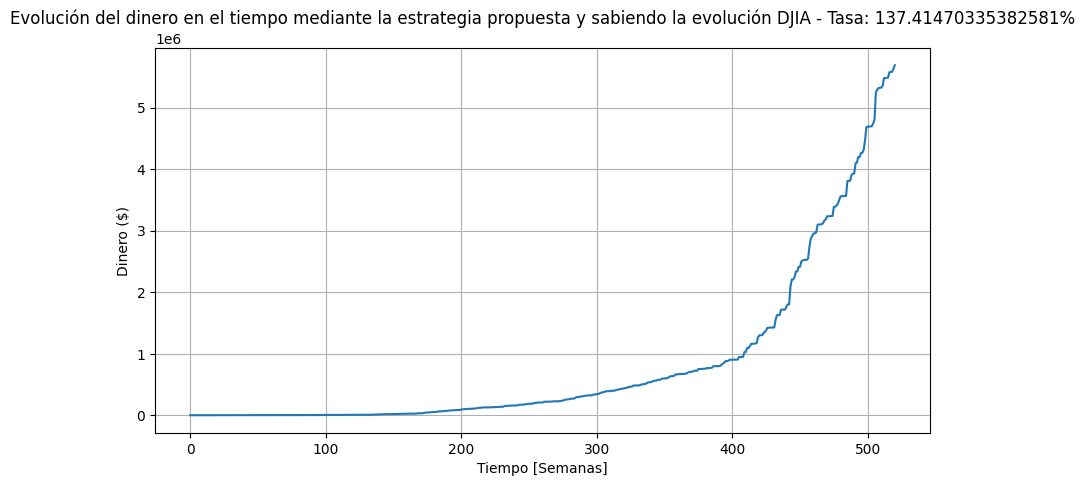

In [1680]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_ideal)
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title(f"Evolución del dinero en el tiempo mediante la estrategia propuesta y sabiendo la evolución DJIA - Tasa: {tasa_equivalente_ideal_anual*100}%")
plt.grid()
plt.show()

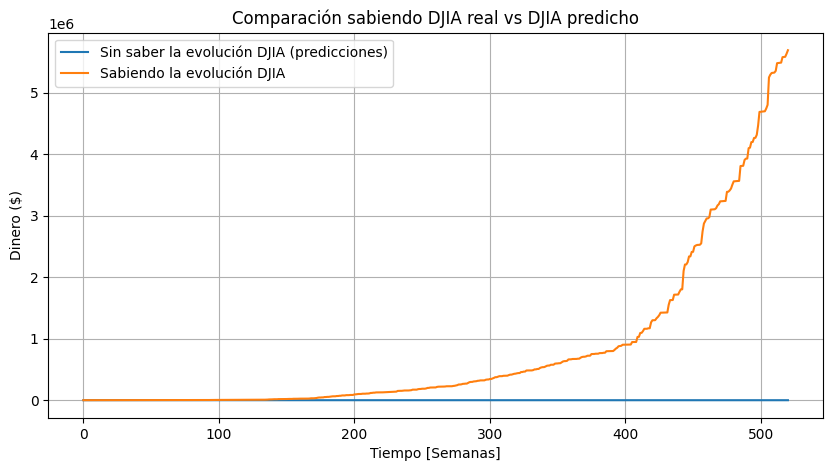

In [1681]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_wiener,label="Sin saber la evolución DJIA (predicciones)")
plt.plot(dinero_estrategia_ideal,label="Sabiendo la evolución DJIA")
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title("Comparación sabiendo DJIA real vs DJIA predicho")
plt.grid()
plt.legend()
plt.show()

b) Asumiendo que el dinero fue puesto en el banco a una tasa de 3% anual que capitaliza semanalmente.

In [1682]:
dinero_estrategia_banco_decada=1000*(1+tasa_efectiva_banco_semanal)**np.arange(n_semanas+1)

tasa_equivalente_banco_anual_decada=(dinero_estrategia_banco_decada[-1]/dinero_estrategia_banco_decada[0])**(52/n_semanas)-1

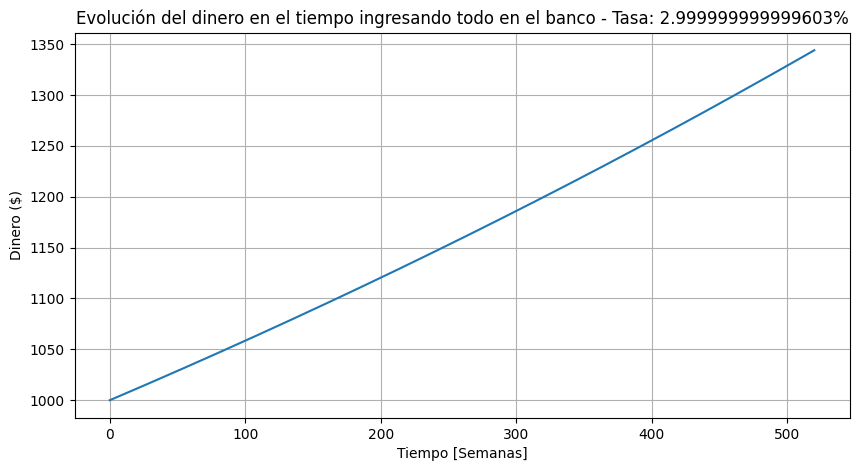

In [1683]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_banco_decada)
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title(f"Evolución del dinero en el tiempo ingresando todo en el banco - Tasa: {tasa_equivalente_banco_anual_decada*100}%")
plt.grid()
plt.show()

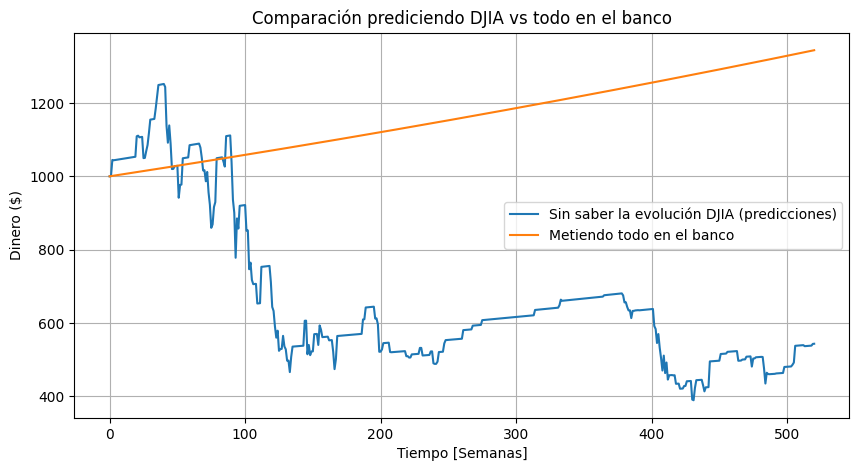

In [1684]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_wiener,label="Sin saber la evolución DJIA (predicciones)")
plt.plot(dinero_estrategia_banco_decada,label="Metiendo todo en el banco")
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title("Comparación prediciendo DJIA vs todo en el banco")
plt.grid()
plt.legend()
plt.show()

c) Asumiendo que en todo momento su dinero se mantuvo en la bolsa tal que éste evoluciono de acuerdo a la variación del índice DJIA.

In [1685]:
dinero_estrategia_bolsa_decada=np.concat(([1000],np.zeros(n_semanas)))

for i in range(n_semanas):
    valor_real_actual=valor_real[i]
    valor_real_siguienteSemana=valor_real[i+1]
    dinero_estrategia_bolsa_decada[i+1]=dinero_estrategia_bolsa_decada[i]*valor_real_siguienteSemana/valor_real_actual

tasa_equivalente_bolsa_anual_decada=(dinero_estrategia_bolsa_decada[-1]/dinero_estrategia_bolsa_decada[0])**(52/n_semanas)-1

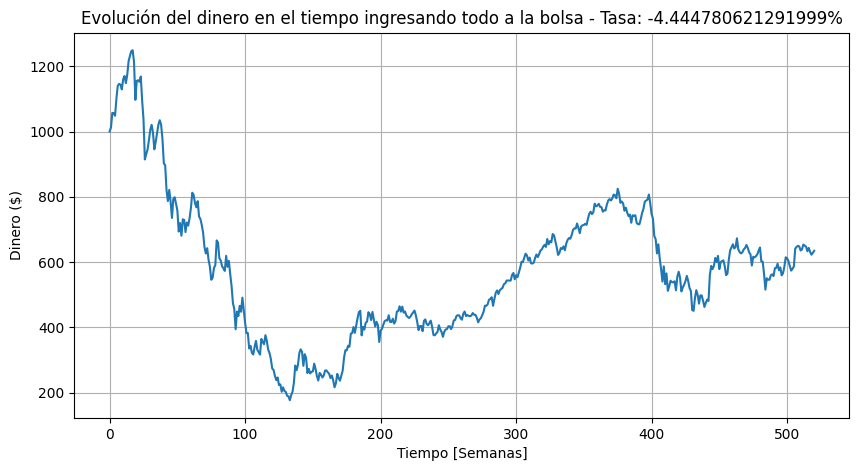

In [1686]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_bolsa_decada)
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title(f"Evolución del dinero en el tiempo ingresando todo a la bolsa - Tasa: {tasa_equivalente_bolsa_anual_decada*100}%")
plt.grid()
plt.show()

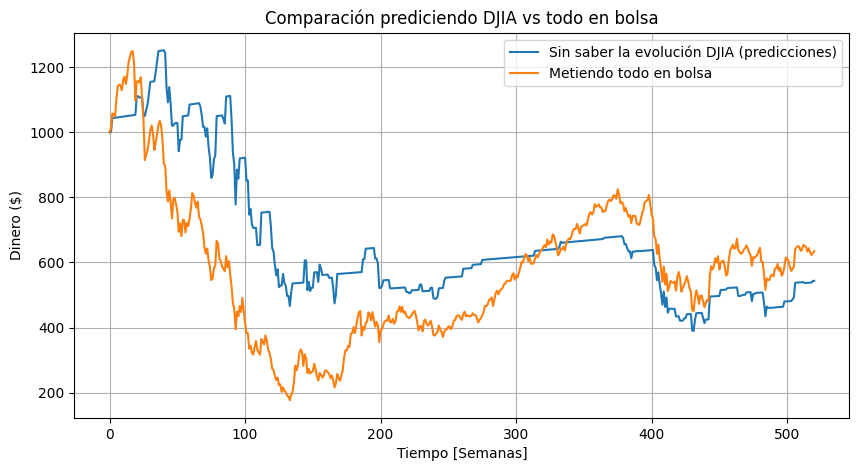

In [1687]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_wiener,label="Sin saber la evolución DJIA (predicciones)")
plt.plot(dinero_estrategia_bolsa_decada,label="Metiendo todo en bolsa")
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title("Comparación prediciendo DJIA vs todo en bolsa")
plt.grid()
plt.legend()
plt.show()

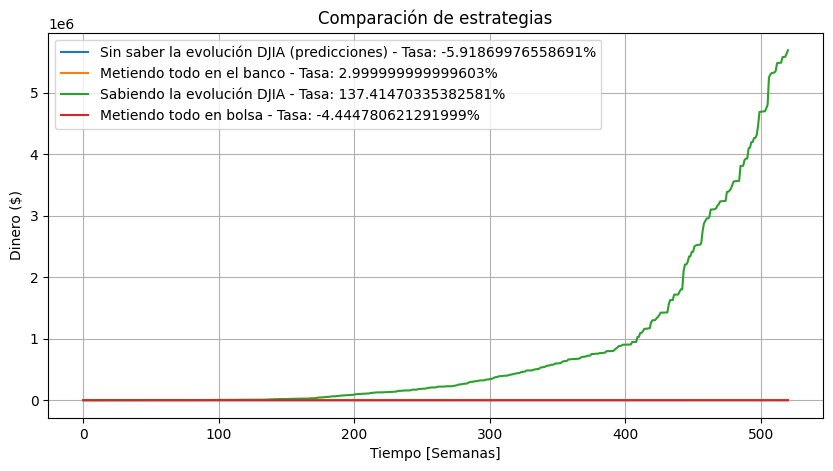

In [1688]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_wiener,label=f"Sin saber la evolución DJIA (predicciones) - Tasa: {tasa_equivalente_prediccion_anual_wiener*100}%")
plt.plot(dinero_estrategia_banco_decada,label=f"Metiendo todo en el banco - Tasa: {tasa_equivalente_banco_anual_decada*100}%")
plt.plot(dinero_estrategia_ideal,label=f"Sabiendo la evolución DJIA - Tasa: {tasa_equivalente_ideal_anual*100}%")
plt.plot(dinero_estrategia_bolsa_decada,label=f"Metiendo todo en bolsa - Tasa: {tasa_equivalente_bolsa_anual_decada*100}%")
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title("Comparación de estrategias")
plt.grid()
plt.legend()
plt.show()

La predicción realizada por el filtro Wiener no es buena. En concreto, solo permite obtener una tasa efectiva de crecimiento de dinero anual mayor al caso en el que se mantuviera todo el dinero en bolsa. Todas las tasas están expresadas en el gráfico de arriba.

Extra: Se va a evaluar la rentabilidad que se puede obtener con el valor de P que minimizaba el MSE: P = 158

In [1689]:
#vamos a aplicar una simulación en base a los valores de las predicciones
P_extra=158
n_semanas=520
entrada=x[:n_semanas] # x[n]
h_wiener=filtro_wiener(entrada,P_extra)

x_n0_extra=x[:n_semanas+P_extra+1]
prediccion_extra=sci.signal.lfilter(h_wiener,[1],x_n0_extra)
prediccion_extra=np.concat(([x_n0_extra[0]],prediccion_extra[:-1]))

prediccion_aux_extra=prediccion_extra[P_extra:P_extra+n_semanas] #x[n+1]
valor_real_extra=x_n0_extra[P_extra-1:P_extra+n_semanas]# x[n]
dinero_estrategia_wiener_extra=np.concat(([1000],np.zeros(n_semanas)))

tasa_efectiva_banco_semanal=(1+0.03)**(1/52)-1
contador_predicciones_correctas_wiener_minMSE=0
acumulador_perdidas_wiener_minMSE=[]
acumulador_ganancias_wiener_minMSE=[]
for i in range(n_semanas):
    valor_real_actual=valor_real_extra[i]
    valor_predicho_siguienteSemana=prediccion_aux_extra[i]
    valor_real_siguienteSemana=valor_real_extra[i+1]
    factor_bolsa=valor_predicho_siguienteSemana/valor_real_actual
    factor_real=valor_real_siguienteSemana/valor_real_actual
    prediccion_correcta=(factor_bolsa>1+tasa_efectiva_banco_semanal and factor_real>1+tasa_efectiva_banco_semanal) or (factor_bolsa<1+tasa_efectiva_banco_semanal and factor_real<1+tasa_efectiva_banco_semanal)
    if factor_bolsa>1+tasa_efectiva_banco_semanal:
        dinero_estrategia_wiener_extra[i+1]=dinero_estrategia_wiener_extra[i]*valor_real_siguienteSemana/valor_real_actual
    else:
        dinero_estrategia_wiener_extra[i+1]=dinero_estrategia_wiener_extra[i]*(1+tasa_efectiva_banco_semanal)
    if prediccion_correcta:
        contador_predicciones_correctas_wiener_minMSE+=1
        acumulador_ganancias_wiener_minMSE.append(dinero_estrategia_wiener_extra[i+1]-dinero_estrategia_wiener_extra[i])
    else:
        acumulador_perdidas_wiener_minMSE.append(dinero_estrategia_wiener_extra[i]-dinero_estrategia_wiener_extra[i+1])

predicciones_correctas_wiener_minMSE=contador_predicciones_correctas_wiener_minMSE/n_semanas*100
tasa_equivalente_prediccion_anual_wiener_extra=(dinero_estrategia_wiener_extra[-1]/dinero_estrategia_wiener_extra[0])**(52/n_semanas)-1
ganancias_promedio_wiener_minMSE=np.mean(acumulador_ganancias_wiener_minMSE)
perdidas_promedio_wiener_minMSE=np.mean(acumulador_perdidas_wiener_minMSE)

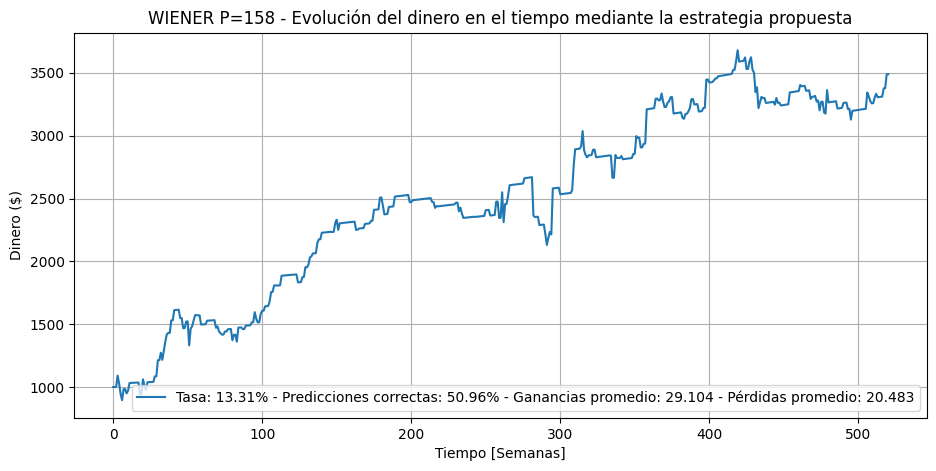

In [1690]:
plt.figure(figsize=(11,5))
plt.plot(dinero_estrategia_wiener_extra,label=f"Tasa: {tasa_equivalente_prediccion_anual_wiener_extra*100:.2f}% - Predicciones correctas: {predicciones_correctas_wiener_minMSE:.2f}% - Ganancias promedio: {ganancias_promedio_wiener_minMSE:.3f} - Pérdidas promedio: {perdidas_promedio_wiener_minMSE:.3f}")
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title(f"WIENER P=158 - Evolución del dinero en el tiempo mediante la estrategia propuesta")
plt.grid()
plt.legend()
plt.show()

Se puede ver que existe un pequeño aumento en la tasa de predicciones correctas, y ello mejora en gran medida la tasa final obtenida para el filtro Wiener. El rendimiento conseguido es mucho mejor que el anterior, a un nivel que parece que en ciertas ocasiones el predictor tuvo "suerte" para conseguir una gran ganancia al hacer una predicción correcta, y una baja penalización al hacer una predicción incorrecta.

5. Dado que los coeficientes del filtro Wiener no varían con el tiempo es posible que no tenga la capacidad de predecir adecuadamente las distintas variaciones del índice DJIA. Para analizar esta situación vamos a implementar un algoritmo de filtro adaptivo que pueda seguir estas variaciones. En esta parte, considere cualquiera de los algoritmos adaptivos tipo LMS que hemos visto en clase y considere la longitud del filtro definida en la parte 3. Compare en un gráfico la evolución de los valores DJIA predichos utilizando el filtro adaptivo y el filtro Wiener con los valores reales para la primera década de datos. Además calcule el error medio cuadrático en cada caso. ¿Qué algoritmo tiene mejor performance?

In [1691]:
# implementación LMS para un predictor lineal
def lms(x,P,mu,h_inicial=None): #h_inicial permite inicializar el valor de los coeficientes
    N=len(x)
    h_adaptativo=np.zeros((N,P))
    if h_inicial is not None:
        h_adaptativo[P - 1, :] = h_inicial  # Se inicializa en el paso P-1
    x_estimado=np.zeros(N)  # Predicciones
    e=np.zeros(N)  # Error de predicción
    
    # Inicializar las primeras P muestras que servirán como muestras retardada
    x_estimado[:P]=x[:P]
    

    #solo se predicen las siguientes N-P muestras. Se empieza evaluando la muestra P
    for n in range(P,N):
        # Vector de entrada: x[n-P:n] en orden inverso para la convolución
        x_n=x[n-P:n][::-1]  # [x[n-1], x[n-2], ..., x[n-P]] Los últimos valores de x para el valor actual de n
        h_n=h_adaptativo[n-1,:] #para establecer la predicción se usan los valores del filtro actualizados para la anterior semana
        # Predicción: suma ponderada de P muestras pasadas
        x_estimado[n]=np.dot(h_n,x_n)
        
        # Error de predicción
        e[n]=x[n]-x_estimado[n]
        
        # Actualización de coeficientes LMS
        h_adaptativo[n,:]=h_n+2*mu*e[n]*x_n
    
    return h_adaptativo,x_estimado,e

In [1692]:
P=10 #este valor es 10
mu=0.85e-6 #este valor lo puse pequeño porque de ser más grande había overflow
n_semanas=520
entrada=x[:n_semanas+P] # x[n]
# Aplicar el algoritmo LMS
h_aux, x_aux, e_aux= lms(entrada,P,mu)
h_lms=h_aux[P:] #solo se extraen las predicciones a partir del coeficiente P
x_lms=x_aux[P:]
e_lms=e_aux[P:]
mse_lms = np.mean(e_lms ** 2)

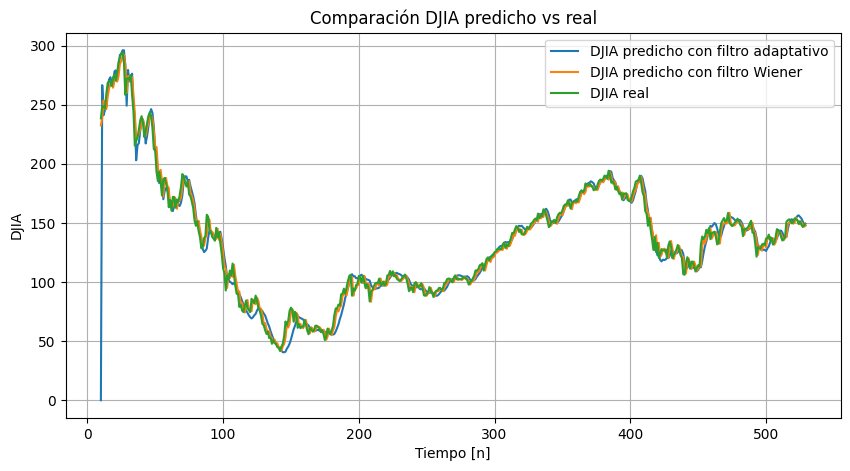

El MSE con el filtro Wiener es de 32.1945514009101
El MSE con el filtro adaptativo es de 165.93846240256212


In [1693]:
rango_predicciones=np.arange(P,n_semanas+P)
plt.figure(figsize=(10,5))
plt.plot(rango_predicciones,x_lms,label="DJIA predicho con filtro adaptativo")
plt.plot(rango_predicciones,prediccion_aux,label="DJIA predicho con filtro Wiener")
plt.plot(rango_predicciones,entrada[P:P+n_semanas],label="DJIA real")
plt.xlabel("Tiempo [n]")
plt.ylabel("DJIA")
plt.title("Comparación DJIA predicho vs real")
plt.grid()
plt.legend()
plt.show()

#error normalizado mediante la fórmula propuesta: Aquí solo se consideran los valores posteriores a la cantidad de términos que se usan para predecir un valor. En este caso P=3, y por lo tanto recién se puede comenzar a evaluar un error para los valores predichos en base a los 3 anteriores valores. Esto es, apartir del cuarto valor.
mse_propuesto_wiener=np.mean(np.abs(prediccion_aux-entrada[P:P+n_semanas])**2)
mse_propuesto_adaptativo=np.mean(np.abs(x_lms-entrada[P:P+n_semanas])**2)
print(f"El MSE con el filtro Wiener es de {mse_propuesto_wiener}")

print(f"El MSE con el filtro adaptativo es de {mse_propuesto_adaptativo}")

In [1694]:
#aquí se considera el error desde la muestra 10, para evitar promediar también el error cuando el filtro recién está inicializándose.
mse_propuesto_wiener=np.mean(np.abs(prediccion_aux[10:]-entrada[P+10:P+n_semanas])**2)
mse_propuesto_adaptativo=np.mean(np.abs(x_lms[10:]-entrada[P+10:P+n_semanas])**2)
print(f"El MSE con el filtro Wiener es de {mse_propuesto_wiener}")

print(f"El MSE con el filtro adaptativo es de {mse_propuesto_adaptativo}")

El MSE con el filtro Wiener es de 31.68630793983744
El MSE con el filtro adaptativo es de 56.58284908026837


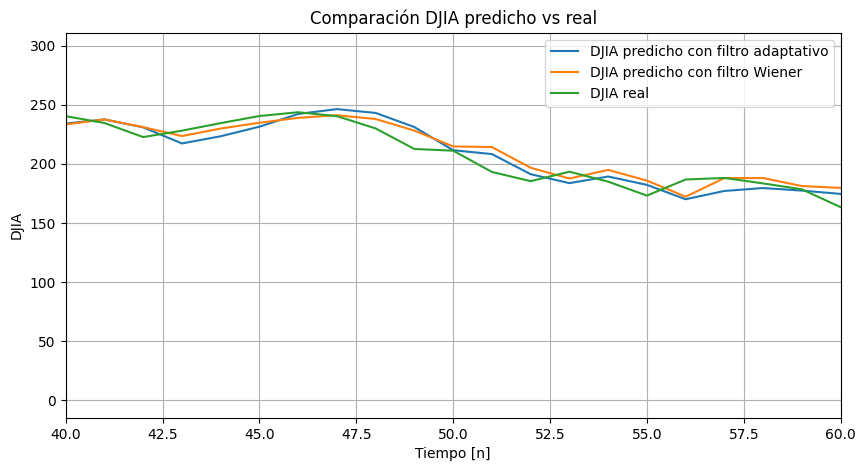

In [1695]:
plt.figure(figsize=(10,5))
plt.plot(rango_predicciones,x_lms,label="DJIA predicho con filtro adaptativo")
plt.plot(rango_predicciones,prediccion_aux,label="DJIA predicho con filtro Wiener")
plt.plot(rango_predicciones,entrada[P:P+n_semanas],label="DJIA real")
plt.xlim([40,60])
plt.xlabel("Tiempo [n]")
plt.ylabel("DJIA")
plt.title("Comparación DJIA predicho vs real")
plt.grid()
plt.legend()
plt.show()

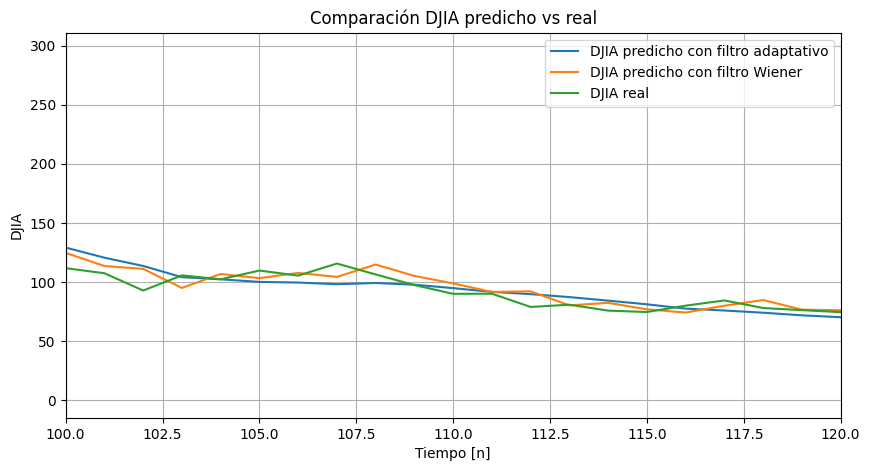

In [1696]:
plt.figure(figsize=(10,5))
plt.plot(rango_predicciones,x_lms,label="DJIA predicho con filtro adaptativo")
plt.plot(rango_predicciones,prediccion_aux,label="DJIA predicho con filtro Wiener")
plt.plot(rango_predicciones,entrada[P:P+n_semanas],label="DJIA real")
plt.xlim([100,120])
plt.xlabel("Tiempo [n]")
plt.ylabel("DJIA")
plt.title("Comparación DJIA predicho vs real")
plt.grid()
plt.legend()
plt.show()

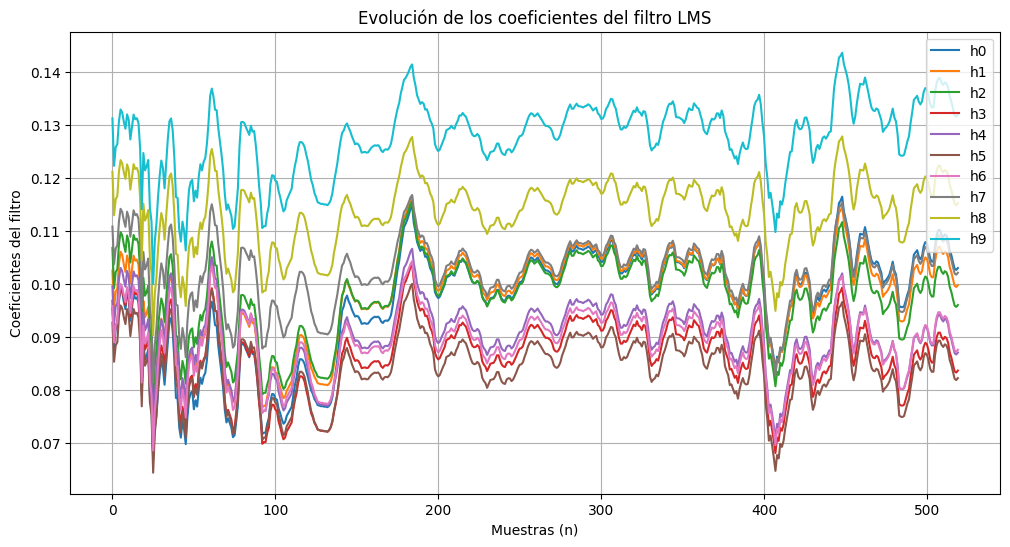

In [1697]:
plt.figure(figsize=(12, 6))
for i in range(P):
    plt.plot(h_lms[:, i], label=f'h{i}')
plt.title("Evolución de los coeficientes del filtro LMS")
plt.xlabel("Muestras (n)")
plt.ylabel("Coeficientes del filtro")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

En la gráfica de la variación de coeficientes del filtro a lo largo del tiempo, se puede observar que no parecen coincidir con los valores de los coeficientes del filtro Wiener diseñado antes. Esto podría ser posible a que el filtro adaptativo con la gradiente descendente ha encontrado un mínimo local, a partir del cuál no logra salir. En teoría, el mínimo posible debería corresponder al filtro Wiener. De no ser así, podríamos afirmar que el proceso no es estacionario.

Vamos a aplicar la estrategia planteada con las predicciones DJIA

In [1698]:
n_semanas=520
# Aplicar el algoritmo LMS
h_aux, x_aux, e_aux= lms(entrada,P,mu)
h_lms=h_aux[P:] #solo se extraen las predicciones a partir del coeficiente P
x_lms=x_aux[P:]

dinero_estrategia_lms_decada=np.concat(([1000],np.zeros(n_semanas)))

tasa_efectiva_banco_semanal=(1+0.03)**(1/52)-1
contador_predicciones_correctas_lms=0
acumulador_perdidas_lms=[]
acumulador_ganancias_lms=[]
for i in range(n_semanas):
    valor_real_actual=valor_real[i]
    valor_predicho_siguienteSemana=x_lms[i]
    valor_real_siguienteSemana=valor_real[i+1]
    factor_bolsa=valor_predicho_siguienteSemana/valor_real_actual
    factor_real=valor_real_siguienteSemana/valor_real_actual
    prediccion_correcta=(factor_bolsa>1+tasa_efectiva_banco_semanal and factor_real>1+tasa_efectiva_banco_semanal) or (factor_bolsa<1+tasa_efectiva_banco_semanal and factor_real<1+tasa_efectiva_banco_semanal)
    if factor_bolsa>(1+tasa_efectiva_banco_semanal):
        dinero_estrategia_lms_decada[i+1]=dinero_estrategia_lms_decada[i]*valor_real_siguienteSemana/valor_real_actual
    else:
        dinero_estrategia_lms_decada[i+1]=dinero_estrategia_lms_decada[i]*(1+tasa_efectiva_banco_semanal)
    if prediccion_correcta:
        contador_predicciones_correctas_lms+=1
        acumulador_ganancias_lms.append(dinero_estrategia_lms_decada[i+1]-dinero_estrategia_lms_decada[i])
    else:
        acumulador_perdidas_lms.append(dinero_estrategia_lms_decada[i]-dinero_estrategia_lms_decada[i+1])
predicciones_correctas_lms=contador_predicciones_correctas_lms/n_semanas*100
tasa_equivalente_prediccion_anual_lms_decada=(dinero_estrategia_lms_decada[-1]/dinero_estrategia_lms_decada[0])**(52/n_semanas)-1
ganancias_promedio_lms=np.mean(acumulador_ganancias_lms)
perdidas_promedio_lms=np.mean(acumulador_perdidas_lms)

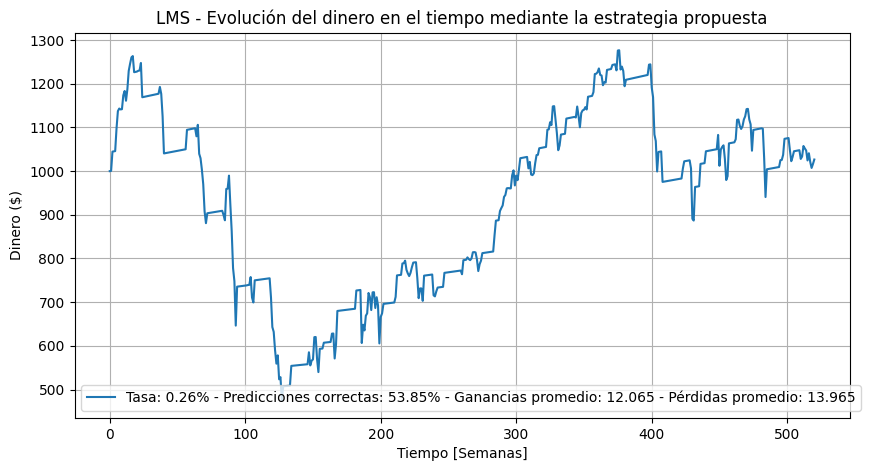

In [1699]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_lms_decada,label=f"Tasa: {tasa_equivalente_prediccion_anual_lms_decada*100:.2f}% - Predicciones correctas: {predicciones_correctas_lms:.2f}% - Ganancias promedio: {ganancias_promedio_lms:.3f} - Pérdidas promedio: {perdidas_promedio_lms:.3f}")
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title("LMS - Evolución del dinero en el tiempo mediante la estrategia propuesta")
plt.grid()
plt.legend()
plt.show()

Se puede ver que a pesar de haber mejorado con el porcentaje de predicciones correctas, la tasa se redujo en comparación a lo obtenido con Wiener con P = 158. Esto se debe a que también depende de qué tipo de predicciones fueron correctas y cuáles incorrectas para determinar una correcta penalización de lo obtenido. No obstante, una tasa de predicciones correctas de alrededor de 50% es muy representativa para una ganancia nula.

Vamos a probar LMS pero esta vez inicializando los valores iniciales del filtro con los valores proporcionados por el filtro Wiener

In [1700]:
P=10 #este valor es 10
mu=0.85e-6 #este valor lo puse pequeño porque de ser más grande había overflow
n_semanas=520
entrada=x[:n_semanas] # x[n]
h_wiener=filtro_wiener(entrada,P)
entrada=x[:n_semanas+P] # x[n] Se reinicializa "entrada" porque para el algoritmo LMS se requieren todos los valores

h_aux, x_aux, e_aux= lms(entrada,P,mu,h_inicial=h_wiener)
h_lms=h_aux[P:] #solo se extraen las predicciones a partir del coeficiente P
x_lms=x_aux[P:]
e_lms=e_aux[P:]
mse_lms = np.mean(e_lms ** 2)

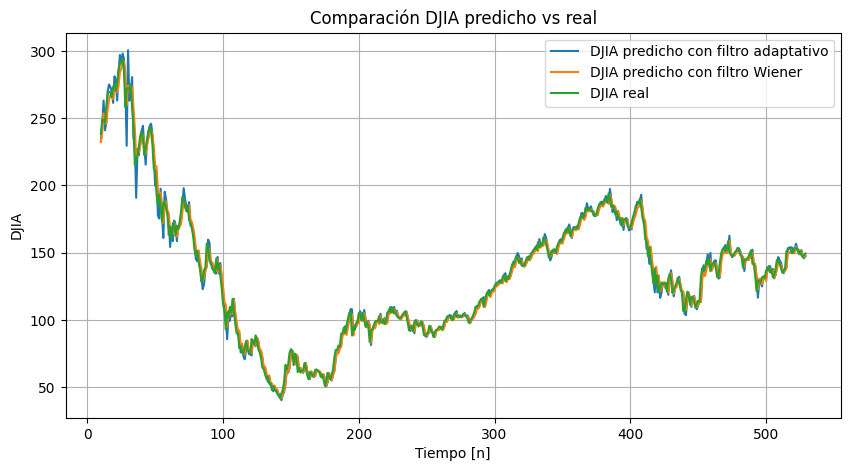

El MSE con el filtro Wiener es de 32.1945514009101
El MSE con el filtro adaptativo es de 40.53799595852767


In [1701]:
rango_predicciones=np.arange(P,n_semanas+P)
plt.figure(figsize=(10,5))
plt.plot(rango_predicciones,x_lms,label="DJIA predicho con filtro adaptativo")
plt.plot(rango_predicciones,prediccion_aux,label="DJIA predicho con filtro Wiener")
plt.plot(rango_predicciones,entrada[P:P+n_semanas],label="DJIA real")
plt.xlabel("Tiempo [n]")
plt.ylabel("DJIA")
plt.title("Comparación DJIA predicho vs real")
plt.grid()
plt.legend()
plt.show()


#error normalizado mediante la fórmula propuesta: Aquí solo se consideran los valores posteriores a la cantidad de términos que se usan para predecir un valor. En este caso P=3, y por lo tanto recién se puede comenzar a evaluar un error para los valores predichos en base a los 3 anteriores valores. Esto es, apartir del cuarto valor.
mse_propuesto_wiener=np.mean(np.abs(prediccion_aux-entrada[P:P+n_semanas])**2)
mse_propuesto_adaptativo=np.mean(np.abs(x_lms-entrada[P:P+n_semanas])**2)
print(f"El MSE con el filtro Wiener es de {mse_propuesto_wiener}")

print(f"El MSE con el filtro adaptativo es de {mse_propuesto_adaptativo}")

In [1702]:
#error normalizado mediante la fórmula propuesta: Aquí solo se consideran los valores posteriores a la cantidad de términos que se usan para predecir un valor. En este caso P=3, y por lo tanto recién se puede comenzar a evaluar un error para los valores predichos en base a los 3 anteriores valores. Esto es, apartir del cuarto valor.
mse_propuesto_wiener=np.mean(np.abs(prediccion_aux[10:]-entrada[P+10:P+n_semanas])**2)
mse_propuesto_adaptativo=np.mean(np.abs(x_lms[10:]-entrada[P+10:P+n_semanas])**2)
print(f"El MSE con el filtro Wiener es de {mse_propuesto_wiener}")

print(f"El MSE con el filtro adaptativo es de {mse_propuesto_adaptativo}")

El MSE con el filtro Wiener es de 31.68630793983744
El MSE con el filtro adaptativo es de 40.067720253633716


Se puede comprobar que el valor de MSE para el filtro adaptativo se redució considerablemente. Esto es gracias a la previa inicialización del filtro con los valores óptimos Wiener, que corresponden teóricamente a lo que debería converger el filtro de ser el proceso estacionario.

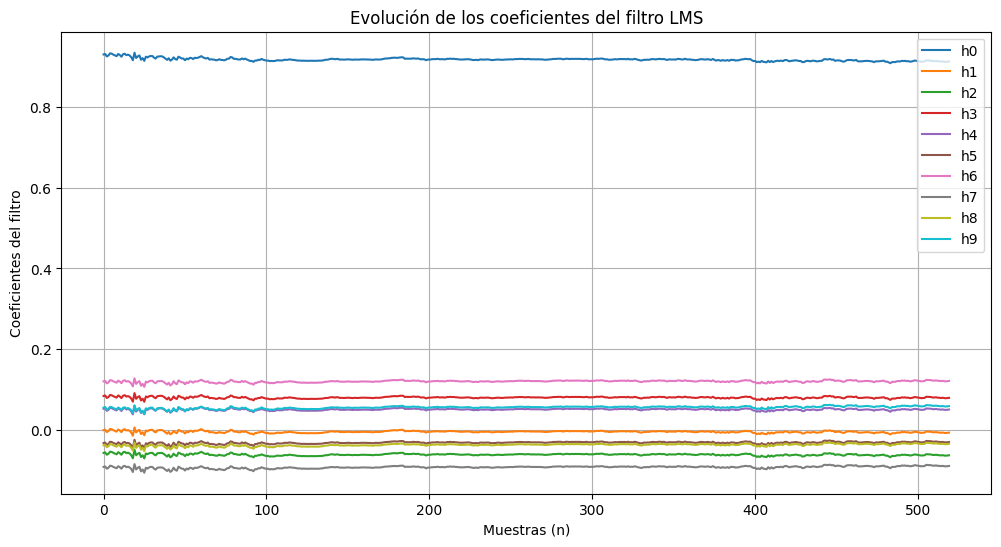

In [1703]:
plt.figure(figsize=(12, 6))
for i in range(P):
    plt.plot(h_lms[:, i], label=f'h{i}')
plt.title("Evolución de los coeficientes del filtro LMS")
plt.xlabel("Muestras (n)")
plt.ylabel("Coeficientes del filtro")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Ahora, se puede observar que los coeficientes del filtro adaptativo han cambiado considerablemente. Todos los coeficientes ahora son más estables, ya no cambian a lo largo del tiempo y tienden a ser muy similares a los coeficientes Wiener.

In [1704]:
n_semanas=520
# Aplicar el algoritmo LMS
h_aux, x_aux, e_aux= lms(entrada,P,mu,h_inicial=h_wiener)
h_lms=h_aux[P:] #solo se extraen las predicciones a partir del coeficiente P
x_lms=x_aux[P:]

dinero_estrategia_lms_inicializado_decada=np.concat(([1000],np.zeros(n_semanas)))

tasa_efectiva_banco_semanal=(1+0.03)**(1/52)-1
contador_predicciones_correctas_lms_inicializado=0
acumulador_perdidas_lms_inicializado=[]
acumulador_ganancias_lms_inicializado=[]
for i in range(n_semanas):
    valor_real_actual=valor_real[i]
    valor_predicho_siguienteSemana=x_lms[i]
    valor_real_siguienteSemana=valor_real[i+1]
    factor_bolsa=valor_predicho_siguienteSemana/valor_real_actual
    factor_real=valor_real_siguienteSemana/valor_real_actual
    prediccion_correcta=(factor_bolsa>1+tasa_efectiva_banco_semanal and factor_real>1+tasa_efectiva_banco_semanal) or (factor_bolsa<1+tasa_efectiva_banco_semanal and factor_real<1+tasa_efectiva_banco_semanal)
    if factor_bolsa>1+tasa_efectiva_banco_semanal:
        dinero_estrategia_lms_inicializado_decada[i+1]=dinero_estrategia_lms_inicializado_decada[i]*valor_real_siguienteSemana/valor_real_actual
    else:
        dinero_estrategia_lms_inicializado_decada[i+1]=dinero_estrategia_lms_inicializado_decada[i]*(1+tasa_efectiva_banco_semanal)
    if prediccion_correcta:
        contador_predicciones_correctas_lms_inicializado+=1
        acumulador_ganancias_lms_inicializado.append(dinero_estrategia_lms_inicializado_decada[i+1]-dinero_estrategia_lms_inicializado_decada[i])
    else:
        acumulador_perdidas_lms_inicializado.append(dinero_estrategia_lms_inicializado_decada[i]-dinero_estrategia_lms_inicializado_decada[i+1])
predicciones_correctas_lms_inicializado=contador_predicciones_correctas_lms_inicializado/n_semanas*100
tasa_equivalente_prediccion_anual_lms_inicializado_decada=(dinero_estrategia_lms_inicializado_decada[-1]/dinero_estrategia_lms_inicializado_decada[0])**(52/n_semanas)-1
ganancias_promedio_lms_inicializado=np.mean(acumulador_ganancias_lms_inicializado)
perdidas_promedio_lms_inicializado=np.mean(acumulador_perdidas_lms_inicializado)

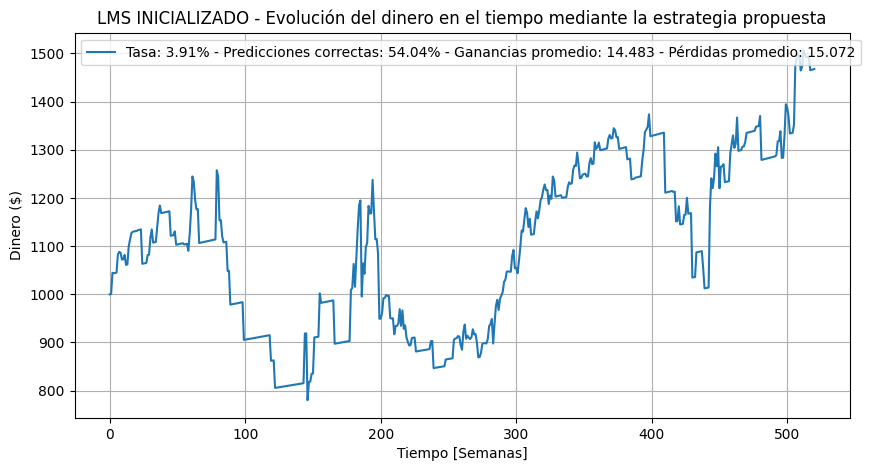

In [1705]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_lms_inicializado_decada, label=f"Tasa: {tasa_equivalente_prediccion_anual_lms_inicializado_decada*100:.2f}% - Predicciones correctas: {predicciones_correctas_lms_inicializado:.2f}% - Ganancias promedio: {ganancias_promedio_lms_inicializado:.3f} - Pérdidas promedio: {perdidas_promedio_lms_inicializado:.3f}")

plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title("LMS INICIALIZADO - Evolución del dinero en el tiempo mediante la estrategia propuesta")
plt.legend(loc="upper left")
plt.grid()
plt.show()

La preinicialización permitió que ahora la estrategia tenga mucha más rentabilidad. Esto se asocia a un aumento en la cantidad de predicciones correctas realizadas.

Gracias a esta preinicialización, vamos a intentar reducir aún más el MSE del filtro adaptativo.

In [1706]:
P=10 #este valor es 10
n_semanas=520
entrada=x[:n_semanas] # x[n]
h_wiener=filtro_wiener(entrada,P)
entrada=x[:n_semanas+P] # x[n] Se reinicializa "entrada" porque para el algoritmo LMS se requieren todos los valores
minimo_mse=9999999
for i in range(1000):
    mu_aux=0.005e-6*i
    h_aux, x_aux, e_aux= lms(entrada,P,mu_aux,h_inicial=h_wiener)
    h_lms=h_aux[P:] #solo se extraen las predicciones a partir del coeficiente P
    x_lms=x_aux[P:]
    e_lms=e_aux[P:]

    mse_propuesto_adaptativo=np.mean(np.abs(x_lms-entrada[P:P+n_semanas])**2)

    
    if mse_propuesto_adaptativo<minimo_mse:
        minimo_mse=mse_propuesto_adaptativo
        mu_ganador=mu_aux
print(f"El mínimo MSE con el filtro adaptativo es de {minimo_mse} para mu={mu_ganador}")

El mínimo MSE con el filtro adaptativo es de 31.97211356568525 para mu=8e-08


Bajo este valor optimizado de mu, vamos a probar la estrategia de inversión

In [1707]:
n_semanas=520
# Aplicar el algoritmo LMS
h_aux, x_aux, e_aux= lms(entrada,P,mu_ganador,h_inicial=h_wiener)
h_lms=h_aux[P:] #solo se extraen las predicciones a partir del coeficiente P
x_lms=x_aux[P:]

dinero_estrategia_lms_inicializado_optimizado_decada=np.concat(([1000],np.zeros(n_semanas)))

tasa_efectiva_banco_semanal=(1+0.03)**(1/52)-1
contador_predicciones_correctas_lms_inicializado_optimizado=0
acumulador_perdidas_lms_inicializado_optimizado=[]
acumulador_ganancias_lms_inicializado_optimizado=[]
for i in range(n_semanas):
    valor_real_actual=valor_real[i]
    valor_predicho_siguienteSemana=x_lms[i]
    valor_real_siguienteSemana=valor_real[i+1]
    factor_bolsa=valor_predicho_siguienteSemana/valor_real_actual
    factor_real=valor_real_siguienteSemana/valor_real_actual
    prediccion_correcta=(factor_bolsa>1+tasa_efectiva_banco_semanal and factor_real>1+tasa_efectiva_banco_semanal) or (factor_bolsa<1+tasa_efectiva_banco_semanal and factor_real<1+tasa_efectiva_banco_semanal)
    if factor_bolsa>(1+tasa_efectiva_banco_semanal):
        dinero_estrategia_lms_inicializado_optimizado_decada[i+1]=dinero_estrategia_lms_inicializado_optimizado_decada[i]*valor_real_siguienteSemana/valor_real_actual
    else:
        dinero_estrategia_lms_inicializado_optimizado_decada[i+1]=dinero_estrategia_lms_inicializado_optimizado_decada[i]*(1+tasa_efectiva_banco_semanal)
    if prediccion_correcta:
        contador_predicciones_correctas_lms_inicializado_optimizado+=1
        acumulador_ganancias_lms_inicializado_optimizado.append(dinero_estrategia_lms_inicializado_optimizado_decada[i+1]-dinero_estrategia_lms_inicializado_optimizado_decada[i])
    else:
        acumulador_perdidas_lms_inicializado_optimizado.append(dinero_estrategia_lms_inicializado_optimizado_decada[i]-dinero_estrategia_lms_inicializado_optimizado_decada[i+1])
predicciones_correctas_lms_inicializado_optimizado=contador_predicciones_correctas_lms_inicializado_optimizado/n_semanas*100
tasa_equivalente_prediccion_anual_lms_inicializado_optimizado_decada=(dinero_estrategia_lms_inicializado_optimizado_decada[-1]/dinero_estrategia_lms_inicializado_optimizado_decada[0])**(52/n_semanas)-1

ganancias_promedio_lms_inicializado_optimizado=np.mean(acumulador_ganancias_lms_inicializado_optimizado)
perdidas_promedio_lms_inicializado_optimizado=np.mean(acumulador_perdidas_lms_inicializado_optimizado)

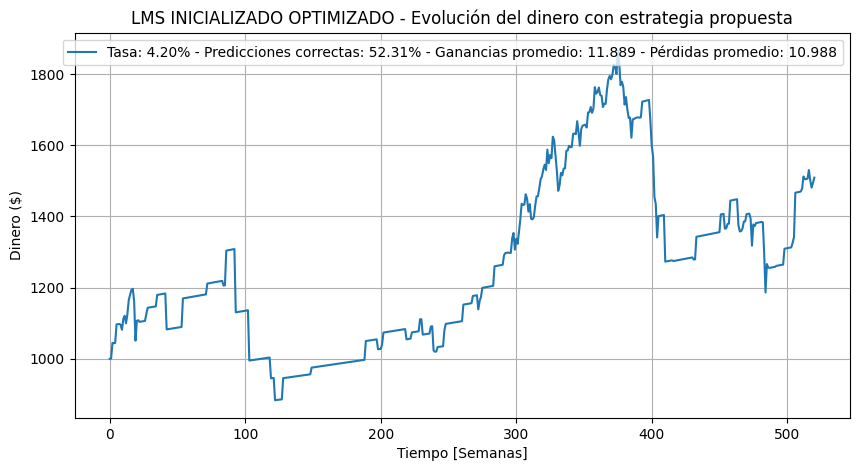

In [1708]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_lms_inicializado_optimizado_decada, label=f"Tasa: {tasa_equivalente_prediccion_anual_lms_inicializado_optimizado_decada*100:.2f}% - Predicciones correctas: {predicciones_correctas_lms_inicializado_optimizado:.2f}% - Ganancias promedio: {ganancias_promedio_lms_inicializado_optimizado:.3f} - Pérdidas promedio: {perdidas_promedio_lms_inicializado_optimizado:.3f}")
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title("LMS INICIALIZADO OPTIMIZADO - Evolución del dinero con estrategia propuesta")
plt.legend()
plt.grid()
plt.show()

6. Finalmente, vamos a aplicar los sistemas de predicción diseñados (filtro Wiener y filtro adaptivo) a toda la secuencia de datos de DJIA correspondiente a aproximadamente siete décadas. Siguiendo la estrategia de inversión definida anteriormente y asumiendo que inicialmente contamos con $1000, grafique la evolución del dinero obtenida utilizando cada uno de los sistemas de predicción diseñados. Compare en un gráfico estos resultados con las situaciones definidas en la parte 4 y determine cuál de los sistemas de predicción permitió obtener una mayor ganancia de interés anual r (compuesto semanalmente), ¿cuál debería ser el valor de r para obtener una ganancia equivalente a la de invertir el dinero en la bolsa?

De saber el valor DJIA (predictor ideal)

In [1709]:
x_n0=x.copy()
n_semanas_prediccion=len(x_n0)-P
valor_real=x_n0[P-1:P+n_semanas_prediccion]# x[n]
dinero_estrategia_ideal_completo=np.concat((np.array([1000]),np.zeros(n_semanas_prediccion)))

for i in range(n_semanas_prediccion):
    valor_real_actual=valor_real[i]
    valor_real_siguienteSemana=valor_real[i+1]
    factor_bolsa=valor_real_siguienteSemana/valor_real_actual
    if factor_bolsa>(1+tasa_efectiva_banco_semanal):
        dinero_estrategia_ideal_completo[i+1]=dinero_estrategia_ideal_completo[i]*factor_bolsa
    else:
        dinero_estrategia_ideal_completo[i+1]=dinero_estrategia_ideal_completo[i]*(1+tasa_efectiva_banco_semanal)
tasa_equivalente_ideal_anual=(dinero_estrategia_ideal_completo[-1]/dinero_estrategia_ideal_completo[0])**(52/n_semanas_prediccion)-1

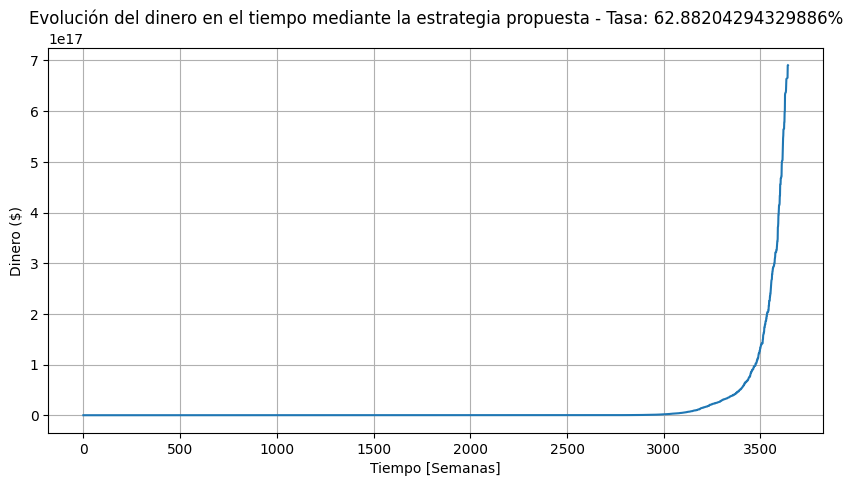

In [1710]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_ideal_completo)
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title(f"Evolución del dinero en el tiempo mediante la estrategia propuesta - Tasa: {tasa_equivalente_ideal_anual*100}%")
plt.grid()
plt.show()

De ingresar todo al banco

In [1711]:
dinero_estrategia_banco_completo=1000*(1+tasa_efectiva_banco_semanal)**np.arange(n_semanas_prediccion+1)

tasa_equivalente_banco_anual_completo=(dinero_estrategia_banco_completo[-1]/dinero_estrategia_banco_completo[0])**(52/n_semanas_prediccion)-1

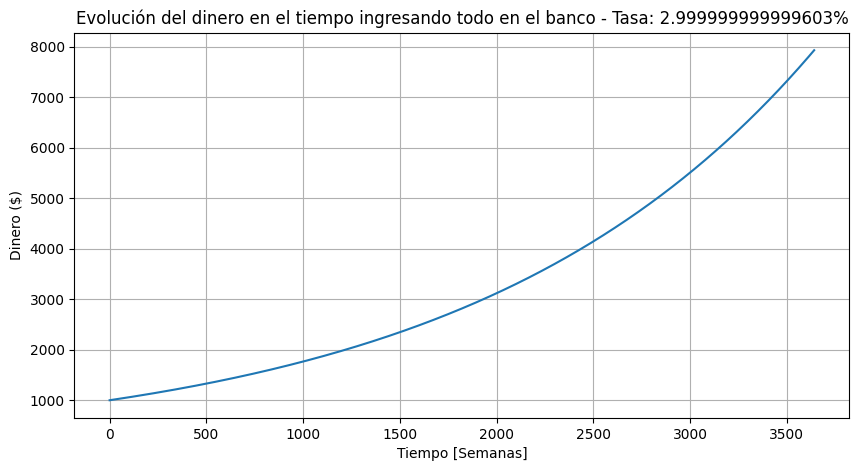

In [1712]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_banco_completo)
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title(f"Evolución del dinero en el tiempo ingresando todo en el banco - Tasa: {tasa_equivalente_banco_anual_completo*100}%")
plt.grid()
plt.show()

Asumiendo que en todo momento su dinero se mantuvo en la bolsa tal que éste evoluciono de acuerdo a la variación del índice DJIA.

In [1713]:
dinero_estrategia_bolsa_completo=np.concat(([1000],np.zeros(n_semanas_prediccion)))

for i in range(n_semanas_prediccion):
    valor_real_actual=valor_real[i]
    valor_real_siguienteSemana=valor_real[i+1]
    dinero_estrategia_bolsa_completo[i+1]=dinero_estrategia_bolsa_completo[i]*valor_real_siguienteSemana/valor_real_actual

tasa_equivalente_bolsa_anual_completo=(dinero_estrategia_bolsa_completo[-1]/dinero_estrategia_bolsa_completo[0])**(52/n_semanas_prediccion)-1

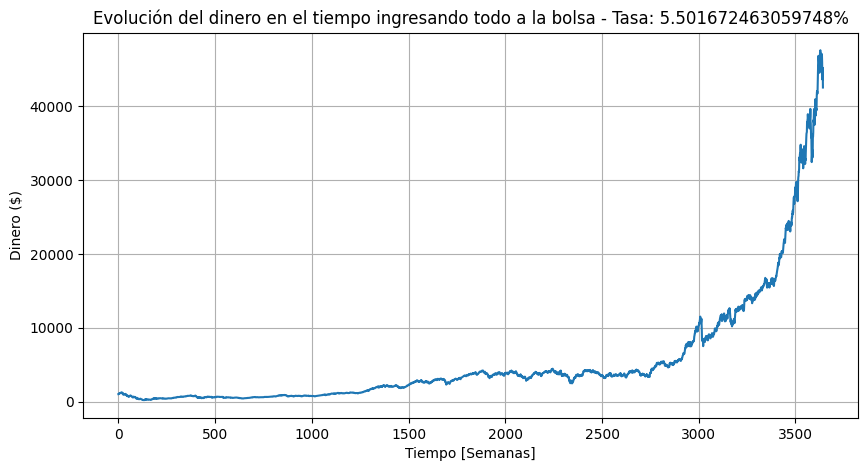

In [1714]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_bolsa_completo)
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title(f"Evolución del dinero en el tiempo ingresando todo a la bolsa - Tasa: {tasa_equivalente_bolsa_anual_completo*100}%")
plt.grid()
plt.show()

Empleando predicciones con el filtro Wiener. Nota: Se conservaron los coeficientes del filtro diseñado antes. Al mencionar aplicar los filtros diseñados, se puede entender que no se busca cambiar sus características, y se busca evaluar su rendimiento en nuevas semanas.

In [1715]:
#vamos a aplicar una simulación en base a los valores de las predicciones
P=10
n_semanas=520
entrada=x[:n_semanas] # x[n]
h_wiener=filtro_wiener(entrada,P)


prediccion=sci.signal.lfilter(h_wiener,[1],x_n0)
prediccion=np.concat(([x_n0[0]],prediccion[:-1]))

prediccion_aux=prediccion[P:P+n_semanas_prediccion] #x[n+1]

dinero_estrategia_wiener1_completo=np.concat(([1000],np.zeros(n_semanas_prediccion)))
contador_predicciones_correctas_wiener1_completo=0
acumulador_perdidas_wiener1_completo=[]
acumulador_ganancias_wiener1_completo=[]
tasa_efectiva_banco_semanal=(1+0.03)**(1/52)-1
for i in range(n_semanas_prediccion):
    valor_real_actual=valor_real[i]
    valor_predicho_siguienteSemana=prediccion_aux[i]
    valor_real_siguienteSemana=valor_real[i+1]
    factor_bolsa=valor_predicho_siguienteSemana/valor_real_actual
    factor_real=valor_real_siguienteSemana/valor_real_actual
    prediccion_correcta=(factor_bolsa>1+tasa_efectiva_banco_semanal and factor_real>1+tasa_efectiva_banco_semanal) or (factor_bolsa<1+tasa_efectiva_banco_semanal and factor_real<1+tasa_efectiva_banco_semanal)
    if factor_bolsa>(1+tasa_efectiva_banco_semanal):
        dinero_estrategia_wiener1_completo[i+1]=dinero_estrategia_wiener1_completo[i]*valor_real_siguienteSemana/valor_real_actual
    else:
        dinero_estrategia_wiener1_completo[i+1]=dinero_estrategia_wiener1_completo[i]*(1+tasa_efectiva_banco_semanal)
    if prediccion_correcta:
        contador_predicciones_correctas_wiener1_completo+=1
        acumulador_ganancias_wiener1_completo.append(dinero_estrategia_wiener1_completo[i+1]-dinero_estrategia_wiener1_completo[i])
    else:
        acumulador_perdidas_wiener1_completo.append(dinero_estrategia_wiener1_completo[i]-dinero_estrategia_wiener1_completo[i+1])
predicciones_correctas_wiener1_completo=contador_predicciones_correctas_wiener1_completo/n_semanas_prediccion*100
ganancias_promedio_wiener1_completo=np.mean(acumulador_ganancias_wiener1_completo)
perdidas_promedio_wiener1_completo=np.mean(acumulador_perdidas_wiener1_completo)
tasa_equivalente_prediccion_anual_wiener1=(dinero_estrategia_wiener1_completo[-1]/dinero_estrategia_wiener1_completo[0])**(52/n_semanas_prediccion)-1

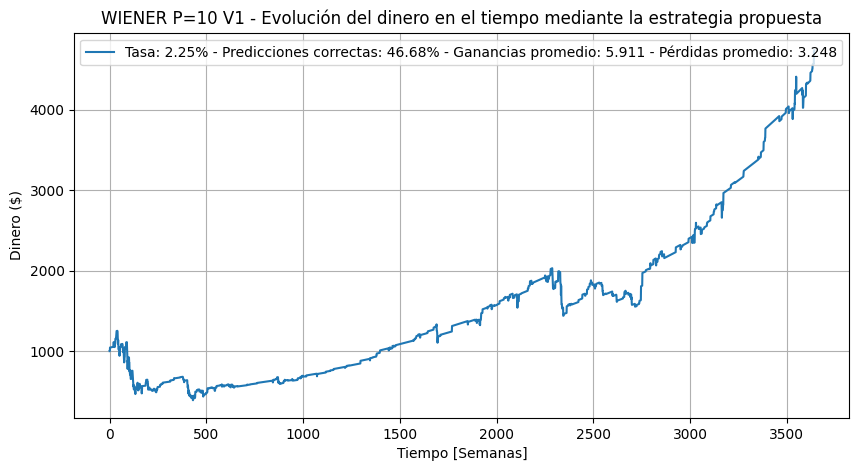

In [1716]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_wiener1_completo,label=f"Tasa: {tasa_equivalente_prediccion_anual_wiener1*100:.2f}% - Predicciones correctas: {predicciones_correctas_wiener1_completo:.2f}% - Ganancias promedio: {ganancias_promedio_wiener1_completo:.3f} - Pérdidas promedio: {perdidas_promedio_wiener1_completo:.3f}")
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title(f"WIENER P=10 V1 - Evolución del dinero en el tiempo mediante la estrategia propuesta")
plt.grid()
plt.legend()
plt.show()

Empleando predicciones con el filtro Wiener actualizado a toda la secuencia

In [1717]:
#vamos a aplicar una simulación en base a los valores de las predicciones
P=10
entrada=x.copy() # x[n]
h_wiener=filtro_wiener(entrada,P)


prediccion=sci.signal.lfilter(h_wiener,[1],x_n0)
prediccion=np.concat(([x_n0[0]],prediccion[:-1]))

prediccion_aux=prediccion[P:P+n_semanas_prediccion] #x[n+1]

dinero_estrategia_wiener2_completo=np.concat(([1000],np.zeros(n_semanas_prediccion)))

tasa_efectiva_banco_semanal=(1+0.03)**(1/52)-1

contador_predicciones_correctas_wiener2_completo=0
acumulador_perdidas_wiener2_completo=[]
acumulador_ganancias_wiener2_completo=[]
for i in range(n_semanas_prediccion):
    valor_real_actual=valor_real[i]
    valor_predicho_siguienteSemana=prediccion_aux[i]
    valor_real_siguienteSemana=valor_real[i+1]
    factor_bolsa=valor_predicho_siguienteSemana/valor_real_actual
    factor_real=valor_real_siguienteSemana/valor_real_actual
    prediccion_correcta=(factor_bolsa>1+tasa_efectiva_banco_semanal and factor_real>1+tasa_efectiva_banco_semanal) or (factor_bolsa<1+tasa_efectiva_banco_semanal and factor_real<1+tasa_efectiva_banco_semanal)
    if factor_bolsa>(1+tasa_efectiva_banco_semanal):
        dinero_estrategia_wiener2_completo[i+1]=dinero_estrategia_wiener2_completo[i]*valor_real_siguienteSemana/valor_real_actual
    else:
        dinero_estrategia_wiener2_completo[i+1]=dinero_estrategia_wiener2_completo[i]*(1+tasa_efectiva_banco_semanal)
    if prediccion_correcta:
        contador_predicciones_correctas_wiener2_completo+=1
        acumulador_ganancias_wiener2_completo.append(dinero_estrategia_wiener2_completo[i+1]-dinero_estrategia_wiener2_completo[i])
    else:
        acumulador_perdidas_wiener2_completo.append(dinero_estrategia_wiener2_completo[i]-dinero_estrategia_wiener2_completo[i+1])

tasa_equivalente_prediccion_anual_wiener2=(dinero_estrategia_wiener2_completo[-1]/dinero_estrategia_wiener2_completo[0])**(52/n_semanas_prediccion)-1
predicciones_correctas_wiener2_completo=contador_predicciones_correctas_wiener2_completo/n_semanas_prediccion*100
ganancias_promedio_wiener2_completo=np.mean(acumulador_ganancias_wiener2_completo)
perdidas_promedio_wiener2_completo=np.mean(acumulador_perdidas_wiener2_completo)

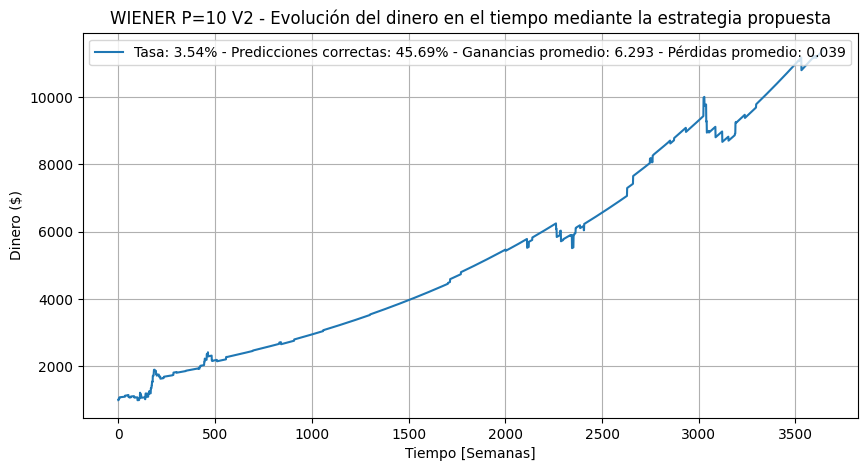

In [1718]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_wiener2_completo, label=f"Tasa: {tasa_equivalente_prediccion_anual_wiener2*100:.2f}% - Predicciones correctas: {predicciones_correctas_wiener2_completo:.2f}% - Ganancias promedio: {ganancias_promedio_wiener2_completo:.3f} - Pérdidas promedio: {perdidas_promedio_wiener2_completo:.3f}")
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title("WIENER P=10 V2 - Evolución del dinero en el tiempo mediante la estrategia propuesta")
plt.grid()
plt.legend()
plt.show()

Empleando el predictor de filtro LMS. Nota: Para este filtro, se extendió la iteración de nuevos coeficientes debido a que de no calcular los nuevos coeficientes, el filtro iba a quedar estático hasta las últimas semanas, y no iba a mantener su caracter variante.

In [1719]:
P=10 #este valor es 10
mu=0.725e-9 #este valor lo puse pequeño porque de ser más grande había overflow. El valor puesto minimiza el MSE
entrada=x.copy() # x[n]
# Aplicar el algoritmo LMS
h_aux, x_aux, e_aux= lms(entrada,P,mu)
h_lms=h_aux[P:] #solo se extraen las predicciones a partir del coeficiente P
x_lms=x_aux[P:]

dinero_estrategia_lms_completo=np.concat(([1000],np.zeros(n_semanas_prediccion)))

tasa_efectiva_banco_semanal=(1+0.03)**(1/52)-1

contador_predicciones_correctas_lms_completo=0
acumulador_perdidas_lms_completo=[]
acumulador_ganancias_lms_completo=[]
for i in range(n_semanas_prediccion):
    valor_real_actual=valor_real[i]
    valor_predicho_siguienteSemana=x_lms[i]
    valor_real_siguienteSemana=valor_real[i+1]
    factor_bolsa=valor_predicho_siguienteSemana/valor_real_actual
    factor_real=valor_real_siguienteSemana/valor_real_actual
    prediccion_correcta=(factor_bolsa>1+tasa_efectiva_banco_semanal and factor_real>1+tasa_efectiva_banco_semanal) or (factor_bolsa<1+tasa_efectiva_banco_semanal and factor_real<1+tasa_efectiva_banco_semanal)
    if factor_bolsa>(1+tasa_efectiva_banco_semanal):
        dinero_estrategia_lms_completo[i+1]=dinero_estrategia_lms_completo[i]*valor_real_siguienteSemana/valor_real_actual
    else:
        dinero_estrategia_lms_completo[i+1]=dinero_estrategia_lms_completo[i]*(1+tasa_efectiva_banco_semanal)
    if prediccion_correcta:
        contador_predicciones_correctas_lms_completo+=1
        acumulador_ganancias_lms_completo.append(dinero_estrategia_lms_completo[i+1]-dinero_estrategia_lms_completo[i])
    else:
        acumulador_perdidas_lms_completo.append(dinero_estrategia_lms_completo[i]-dinero_estrategia_lms_completo[i+1])
tasa_equivalente_prediccion_anual_lms_completo=(dinero_estrategia_lms_completo[-1]/dinero_estrategia_lms_completo[0])**(52/n_semanas_prediccion)-1
predicciones_correctas_lms_completo=contador_predicciones_correctas_lms_completo/n_semanas_prediccion*100
ganancias_promedio_lms_completo=np.mean(acumulador_ganancias_lms_completo)
perdidas_promedio_lms_completo=np.mean(acumulador_perdidas_lms_completo)

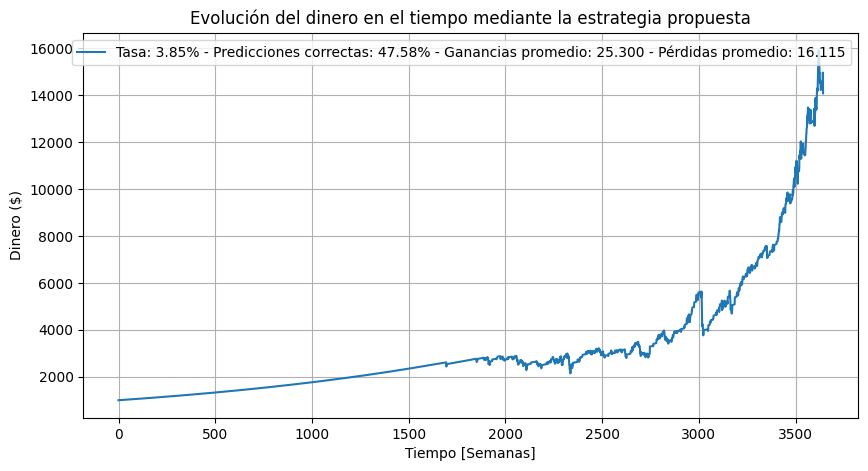

In [1720]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_lms_completo, label=f"Tasa: {tasa_equivalente_prediccion_anual_lms_completo*100:.2f}% - Predicciones correctas: {predicciones_correctas_lms_completo:.2f}% - Ganancias promedio: {ganancias_promedio_lms_completo:.3f} - Pérdidas promedio: {perdidas_promedio_lms_completo:.3f}")
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title("Evolución del dinero en el tiempo mediante la estrategia propuesta")
plt.grid()
plt.legend()
plt.show()

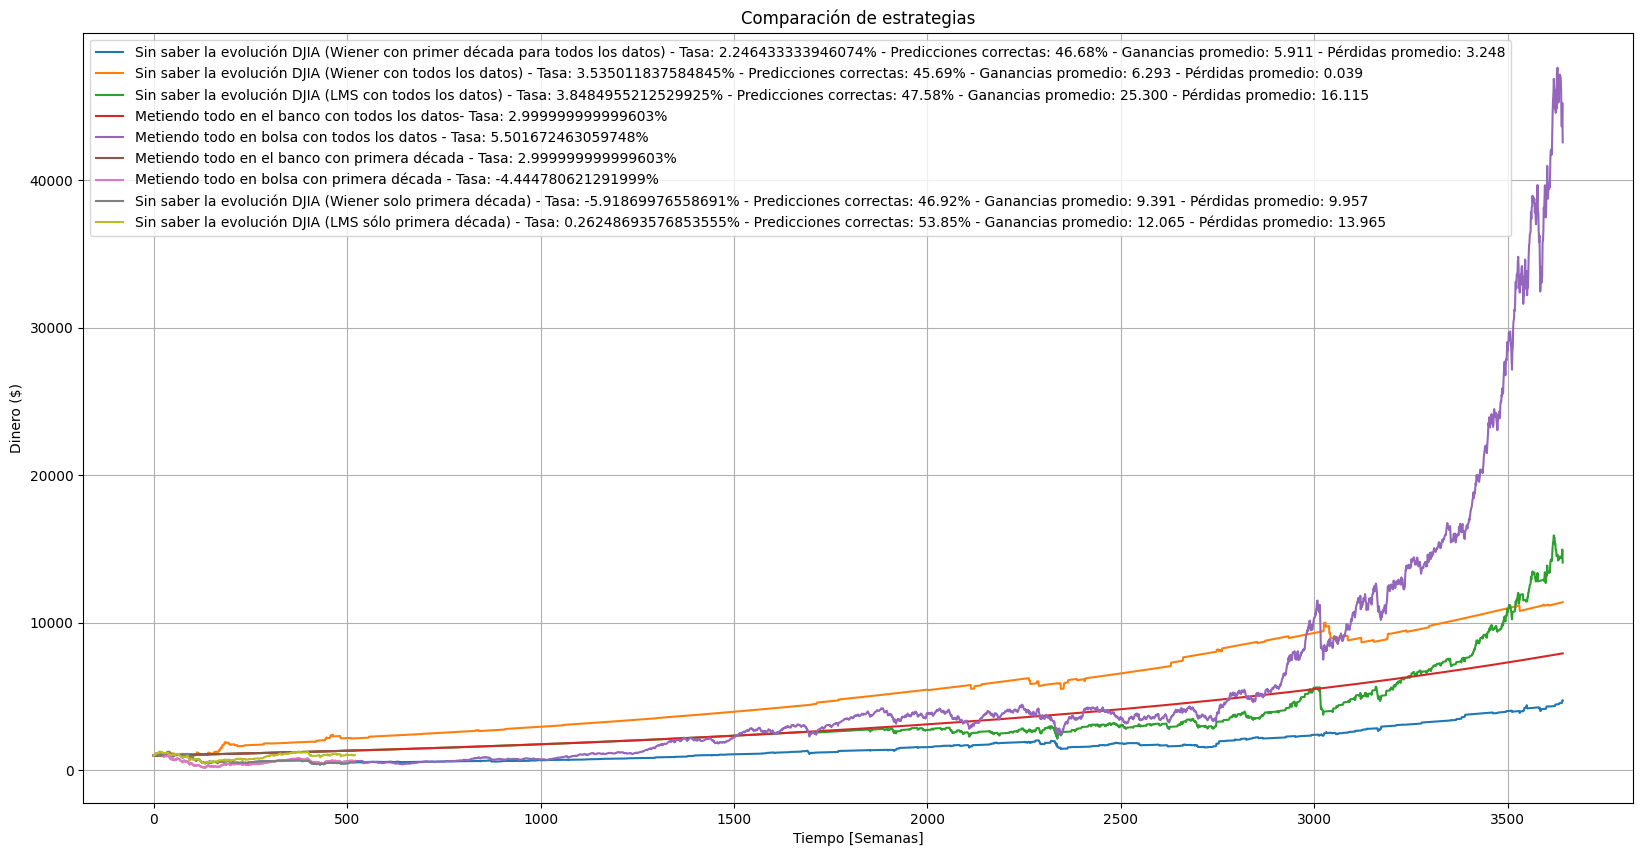

In [1721]:
plt.figure(figsize=(20,10))
plt.plot(dinero_estrategia_wiener1_completo,label=f"Sin saber la evolución DJIA (Wiener con primer década para todos los datos) - Tasa: {tasa_equivalente_prediccion_anual_wiener1*100}% - Predicciones correctas: {predicciones_correctas_wiener1_completo:.2f}% - Ganancias promedio: {ganancias_promedio_wiener1_completo:.3f} - Pérdidas promedio: {perdidas_promedio_wiener1_completo:.3f}")
plt.plot(dinero_estrategia_wiener2_completo,label=f"Sin saber la evolución DJIA (Wiener con todos los datos) - Tasa: {tasa_equivalente_prediccion_anual_wiener2*100}% - Predicciones correctas: {predicciones_correctas_wiener2_completo:.2f}% - Ganancias promedio: {ganancias_promedio_wiener2_completo:.3f} - Pérdidas promedio: {perdidas_promedio_wiener2_completo:.3f}")
plt.plot(dinero_estrategia_lms_completo,label=f"Sin saber la evolución DJIA (LMS con todos los datos) - Tasa: {tasa_equivalente_prediccion_anual_lms_completo*100}% - Predicciones correctas: {predicciones_correctas_lms_completo:.2f}% - Ganancias promedio: {ganancias_promedio_lms_completo:.3f} - Pérdidas promedio: {perdidas_promedio_lms_completo:.3f}")
plt.plot(dinero_estrategia_banco_completo,label=f"Metiendo todo en el banco con todos los datos- Tasa: {tasa_equivalente_banco_anual_completo*100}%")
plt.plot(dinero_estrategia_bolsa_completo,label=f"Metiendo todo en bolsa con todos los datos - Tasa: {tasa_equivalente_bolsa_anual_completo*100}%")
plt.plot(dinero_estrategia_banco_decada,label=f"Metiendo todo en el banco con primera década - Tasa: {tasa_equivalente_banco_anual_decada*100}%")
plt.plot(dinero_estrategia_bolsa_decada,label=f"Metiendo todo en bolsa con primera década - Tasa: {tasa_equivalente_bolsa_anual_decada*100}%")
plt.plot(dinero_estrategia_wiener,label=f"Sin saber la evolución DJIA (Wiener solo primera década) - Tasa: {tasa_equivalente_prediccion_anual_wiener*100}% - Predicciones correctas: {predicciones_correctas_wiener:.2f}% - Ganancias promedio: {ganancias_promedio_wiener:.3f} - Pérdidas promedio: {perdidas_promedio_wiener:.3f}")
plt.plot(dinero_estrategia_lms_decada,label=f"Sin saber la evolución DJIA (LMS sólo primera década) - Tasa: {tasa_equivalente_prediccion_anual_lms_decada*100}% - Predicciones correctas: {predicciones_correctas_lms:.2f}% - Ganancias promedio: {ganancias_promedio_lms:.3f} - Pérdidas promedio: {perdidas_promedio_lms:.3f}")
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title("Comparación de estrategias")
plt.grid()
plt.legend()
plt.show()

Extra: vamos a probar el algoritmo LMS con 158 componentes

In [1722]:
P_extra=158
mu_extra=0.725e-9 #este valor lo puse pequeño porque de ser más grande había overflow. El valor puesto minimiza el MSE
entrada=x.copy() # x[n]
# Aplicar el algoritmo LMS
h_aux_extra, x_aux_extra, e_aux_extra= lms(entrada,P_extra,mu_extra)
h_lms_extra=h_aux_extra[P:] #solo se extraen las predicciones a partir del coeficiente P
x_lms_extra=x_aux_extra[P:]

dinero_estrategia_lms_completo_extra=np.concat(([1000],np.zeros(n_semanas_prediccion)))

tasa_efectiva_banco_semanal=(1+0.03)**(1/52)-1


contador_predicciones_correctas_lms_completo_extra=0
acumulador_perdidas_lms_completo_extra=[]
acumulador_ganancias_lms_completo_extra=[]

for i in range(n_semanas_prediccion):
    valor_real_actual=valor_real[i]
    valor_predicho_siguienteSemana=x_lms_extra[i]
    valor_real_siguienteSemana=valor_real[i+1]
    factor_bolsa=valor_predicho_siguienteSemana/valor_real_actual
    factor_real=valor_real_siguienteSemana/valor_real_actual
    prediccion_correcta=(factor_bolsa>1+tasa_efectiva_banco_semanal and factor_real>1+tasa_efectiva_banco_semanal) or (factor_bolsa<1+tasa_efectiva_banco_semanal and factor_real<1+tasa_efectiva_banco_semanal)
    if factor_bolsa>(1+tasa_efectiva_banco_semanal):
        dinero_estrategia_lms_completo_extra[i+1]=dinero_estrategia_lms_completo_extra[i]*valor_real_siguienteSemana/valor_real_actual
    else:
        dinero_estrategia_lms_completo_extra[i+1]=dinero_estrategia_lms_completo_extra[i]*(1+tasa_efectiva_banco_semanal)
    if prediccion_correcta:
        contador_predicciones_correctas_lms_completo_extra+=1
        acumulador_ganancias_lms_completo_extra.append(dinero_estrategia_lms_completo_extra[i+1]-dinero_estrategia_lms_completo_extra[i])
    else:
        acumulador_perdidas_lms_completo_extra.append(dinero_estrategia_lms_completo_extra[i]-dinero_estrategia_lms_completo_extra[i+1])
tasa_equivalente_prediccion_anual_lms_completo_extra=(dinero_estrategia_lms_completo_extra[-1]/dinero_estrategia_lms_completo_extra[0])**(52/n_semanas_prediccion)-1
predicciones_correctas_lms_completo_extra=contador_predicciones_correctas_lms_completo_extra/n_semanas_prediccion*100
ganancias_promedio_lms_completo_extra=np.mean(acumulador_ganancias_lms_completo_extra)
perdidas_promedio_lms_completo_extra=np.mean(acumulador_perdidas_lms_completo_extra)

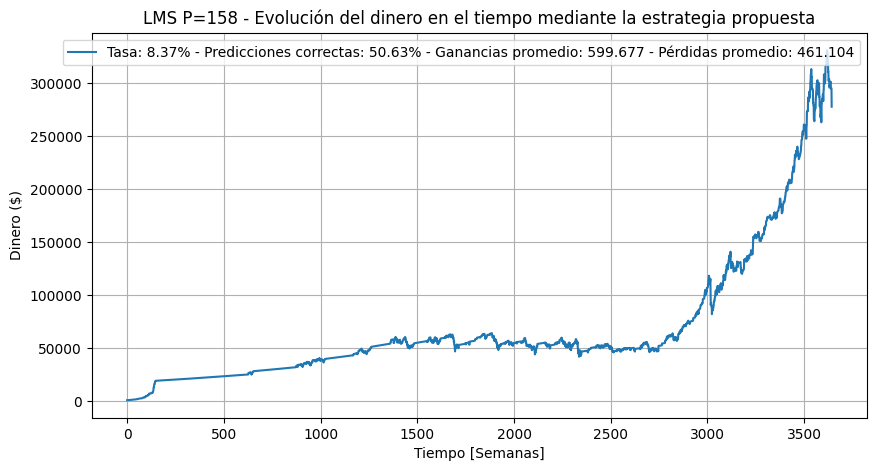

In [1723]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_lms_completo_extra, label=f"Tasa: {tasa_equivalente_prediccion_anual_lms_completo_extra*100:.2f}% - Predicciones correctas: {predicciones_correctas_lms_completo_extra:.2f}% - Ganancias promedio: {ganancias_promedio_lms_completo_extra:.3f} - Pérdidas promedio: {perdidas_promedio_lms_completo_extra:.3f}")
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title("LMS P=158 - Evolución del dinero en el tiempo mediante la estrategia propuesta")
plt.grid()
plt.legend()
plt.show()

Viendo el efecto positivo que tuvo al trabajar con la primera década de datos inicializar los valores de los coeficientes del filtro LMS con los del filtro Wiener, vamos a probar la misma estrategia ahora para toda la secuencia de datos

In [1724]:
P=10 #este valor es 10
n_semanas=520
entrada=x[:n_semanas] # x[n]
h_wiener=filtro_wiener(entrada,P)
mu=0.725e-9 #este valor lo puse pequeño porque de ser más grande había overflow. El valor puesto minimiza el MSE
entrada=x.copy() # x[n]
h_aux, x_aux, e_aux= lms(entrada,P,mu,h_inicial=h_wiener)
h_lms=h_aux[P:] #solo se extraen las predicciones a partir del coeficiente P
x_lms=x_aux[P:]
e_lms=e_aux[P:]
mse_lms = np.mean(e_lms ** 2)


dinero_estrategia_lms_inicializado_completo=np.concat(([1000],np.zeros(n_semanas_prediccion)))

tasa_efectiva_banco_semanal=(1+0.03)**(1/52)-1

contador_predicciones_correctas_lms_inicializado_completo=0
acumulador_perdidas_lms_inicializado_completo=[]
acumulador_ganancias_lms_inicializado_completo=[]
for i in range(n_semanas_prediccion):
    valor_real_actual=valor_real[i]
    valor_predicho_siguienteSemana=x_lms[i]
    valor_real_siguienteSemana=valor_real[i+1]
    factor_bolsa=valor_predicho_siguienteSemana/valor_real_actual
    factor_real=valor_real_siguienteSemana/valor_real_actual
    prediccion_correcta=(factor_bolsa>1+tasa_efectiva_banco_semanal and factor_real>1+tasa_efectiva_banco_semanal) or (factor_bolsa<1+tasa_efectiva_banco_semanal and factor_real<1+tasa_efectiva_banco_semanal)
    if factor_bolsa>(1+tasa_efectiva_banco_semanal):
        dinero_estrategia_lms_inicializado_completo[i+1]=dinero_estrategia_lms_inicializado_completo[i]*valor_real_siguienteSemana/valor_real_actual
    else:
        dinero_estrategia_lms_inicializado_completo[i+1]=dinero_estrategia_lms_inicializado_completo[i]*(1+tasa_efectiva_banco_semanal)
    if prediccion_correcta:
        contador_predicciones_correctas_lms_inicializado_completo+=1
        acumulador_ganancias_lms_inicializado_completo.append(dinero_estrategia_lms_inicializado_completo[i+1]-dinero_estrategia_lms_inicializado_completo[i])
    else:
        acumulador_perdidas_lms_inicializado_completo.append(dinero_estrategia_lms_inicializado_completo[i]-dinero_estrategia_lms_inicializado_completo[i+1])
tasa_equivalente_prediccion_anual_lms_inicializado_completo=(dinero_estrategia_lms_inicializado_completo[-1]/dinero_estrategia_lms_inicializado_completo[0])**(52/n_semanas_prediccion)-1
predicciones_correctas_lms_inicializado_completo=contador_predicciones_correctas_lms_inicializado_completo/n_semanas_prediccion*100
ganancias_promedio_lms_inicializado_completo=np.mean(acumulador_ganancias_lms_inicializado_completo)
perdidas_promedio_lms_inicializado_completo=np.mean(acumulador_perdidas_lms_inicializado_completo)

print(f"El MSE obtenido fue de {mse_lms}")

El MSE obtenido fue de 8250.279405066067


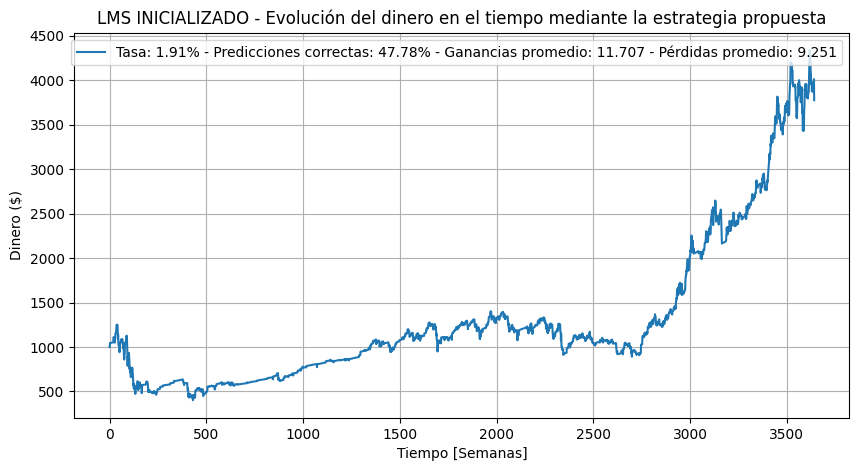

In [1725]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_lms_inicializado_completo, label=f"Tasa: {tasa_equivalente_prediccion_anual_lms_inicializado_completo*100:.2f}% - Predicciones correctas: {predicciones_correctas_lms_inicializado_completo:.2f}% - Ganancias promedio: {ganancias_promedio_lms_inicializado_completo:.3f} - Pérdidas promedio: {perdidas_promedio_lms_inicializado_completo:.3f}")
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title("LMS INICIALIZADO - Evolución del dinero en el tiempo mediante la estrategia propuesta")
plt.legend()
plt.grid()
plt.show()

In [1730]:
P=10 #este valor es 10
entrada=x[:n_semanas_prediccion] # x[n]
h_wiener=filtro_wiener(entrada,P)
mu_aux=0.1e-12 #este valor lo puse pequeño porque de ser más grande había overflow. El valor puesto minimiza el MSE
entrada=x.copy() # x[n]
minimo_mse=99999999

for i in range(1000):
    mu=mu_aux*i*10
    h_aux, x_aux, e_aux= lms(entrada,P,mu,h_inicial=h_wiener)
    h_lms=h_aux[P:] #solo se extraen las predicciones a partir del coeficiente P
    x_lms=x_aux[P:]
    e_lms=e_aux[P:]
    mse_lms = np.mean(e_lms ** 2)
    if mse_lms<minimo_mse:
        minimo_mse=mse_lms
        mu_ganador=mu

print(f"El valor de mu que minimiza el MSE es de {mu_ganador}")

El valor de mu que minimiza el MSE es de 1.0999999999999999e-11


In [1731]:
mu=1.1e-11 #este valor minimiza el MSE
h_aux, x_aux, e_aux= lms(entrada,P,mu,h_inicial=h_wiener)
h_lms=h_aux[P:] #solo se extraen las predicciones a partir del coeficiente P
x_lms=x_aux[P:]
e_lms=e_aux[P:]
mse_lms = np.mean(e_lms ** 2)


dinero_estrategia_lms_inicializado_optimizado_completo=np.concat(([1000],np.zeros(n_semanas_prediccion)))

tasa_efectiva_banco_semanal=(1+0.03)**(1/52)-1

contador_predicciones_correctas_lms_inicializado_optimizado_completo=0
acumulador_perdidas_lms_inicializado_optimizado_completo=[]
acumulador_ganancias_lms_inicializado_optimizado_completo=[]
for i in range(n_semanas_prediccion):
    valor_real_actual=valor_real[i]
    valor_predicho_siguienteSemana=x_lms[i]
    valor_real_siguienteSemana=valor_real[i+1]
    factor_bolsa=valor_predicho_siguienteSemana/valor_real_actual
    factor_real=valor_real_siguienteSemana/valor_real_actual
    prediccion_correcta=(factor_bolsa>1+tasa_efectiva_banco_semanal and factor_real>1+tasa_efectiva_banco_semanal) or (factor_bolsa<1+tasa_efectiva_banco_semanal and factor_real<1+tasa_efectiva_banco_semanal)
    if factor_bolsa>(1+tasa_efectiva_banco_semanal):
        dinero_estrategia_lms_inicializado_optimizado_completo[i+1]=dinero_estrategia_lms_inicializado_optimizado_completo[i]*valor_real_siguienteSemana/valor_real_actual
    else:
        dinero_estrategia_lms_inicializado_optimizado_completo[i+1]=dinero_estrategia_lms_inicializado_optimizado_completo[i]*(1+tasa_efectiva_banco_semanal)
    if prediccion_correcta:
        contador_predicciones_correctas_lms_inicializado_optimizado_completo+=1
        acumulador_ganancias_lms_inicializado_optimizado_completo.append(dinero_estrategia_lms_inicializado_optimizado_completo[i+1]-dinero_estrategia_lms_inicializado_optimizado_completo[i])
    else:
        acumulador_perdidas_lms_inicializado_optimizado_completo.append(dinero_estrategia_lms_inicializado_optimizado_completo[i]-dinero_estrategia_lms_inicializado_optimizado_completo[i+1])
tasa_equivalente_prediccion_anual_lms_inicializado_optimizado_completo=(dinero_estrategia_lms_inicializado_optimizado_completo[-1]/dinero_estrategia_lms_inicializado_optimizado_completo[0])**(52/n_semanas_prediccion)-1
predicciones_correctas_lms_inicializado_optimizado_completo=contador_predicciones_correctas_lms_inicializado_optimizado_completo/n_semanas_prediccion*100
ganancias_promedio_lms_inicializado_optimizado_completo=np.mean(acumulador_ganancias_lms_inicializado_optimizado_completo)
perdidas_promedio_lms_inicializado_optimizado_completo=np.mean(acumulador_perdidas_lms_inicializado_optimizado_completo)

print(f"El MSE obtenido fue de {mse_lms}")

El MSE obtenido fue de 2626.6848501027484


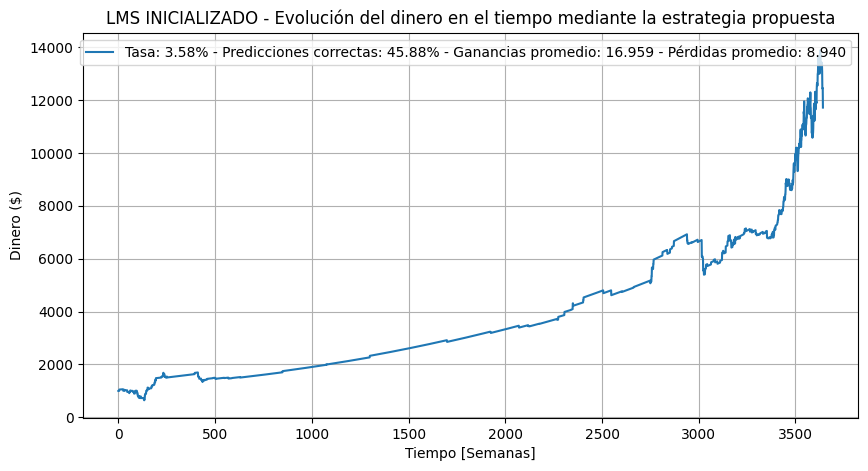

In [1732]:
plt.figure(figsize=(10,5))
plt.plot(dinero_estrategia_lms_inicializado_optimizado_completo, label=f"Tasa: {tasa_equivalente_prediccion_anual_lms_inicializado_optimizado_completo*100:.2f}% - Predicciones correctas: {predicciones_correctas_lms_inicializado_optimizado_completo:.2f}% - Ganancias promedio: {ganancias_promedio_lms_inicializado_optimizado_completo:.3f} - Pérdidas promedio: {perdidas_promedio_lms_inicializado_optimizado_completo:.3f}")
plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title("LMS INICIALIZADO - Evolución del dinero en el tiempo mediante la estrategia propuesta")
plt.legend()
plt.grid()
plt.show()

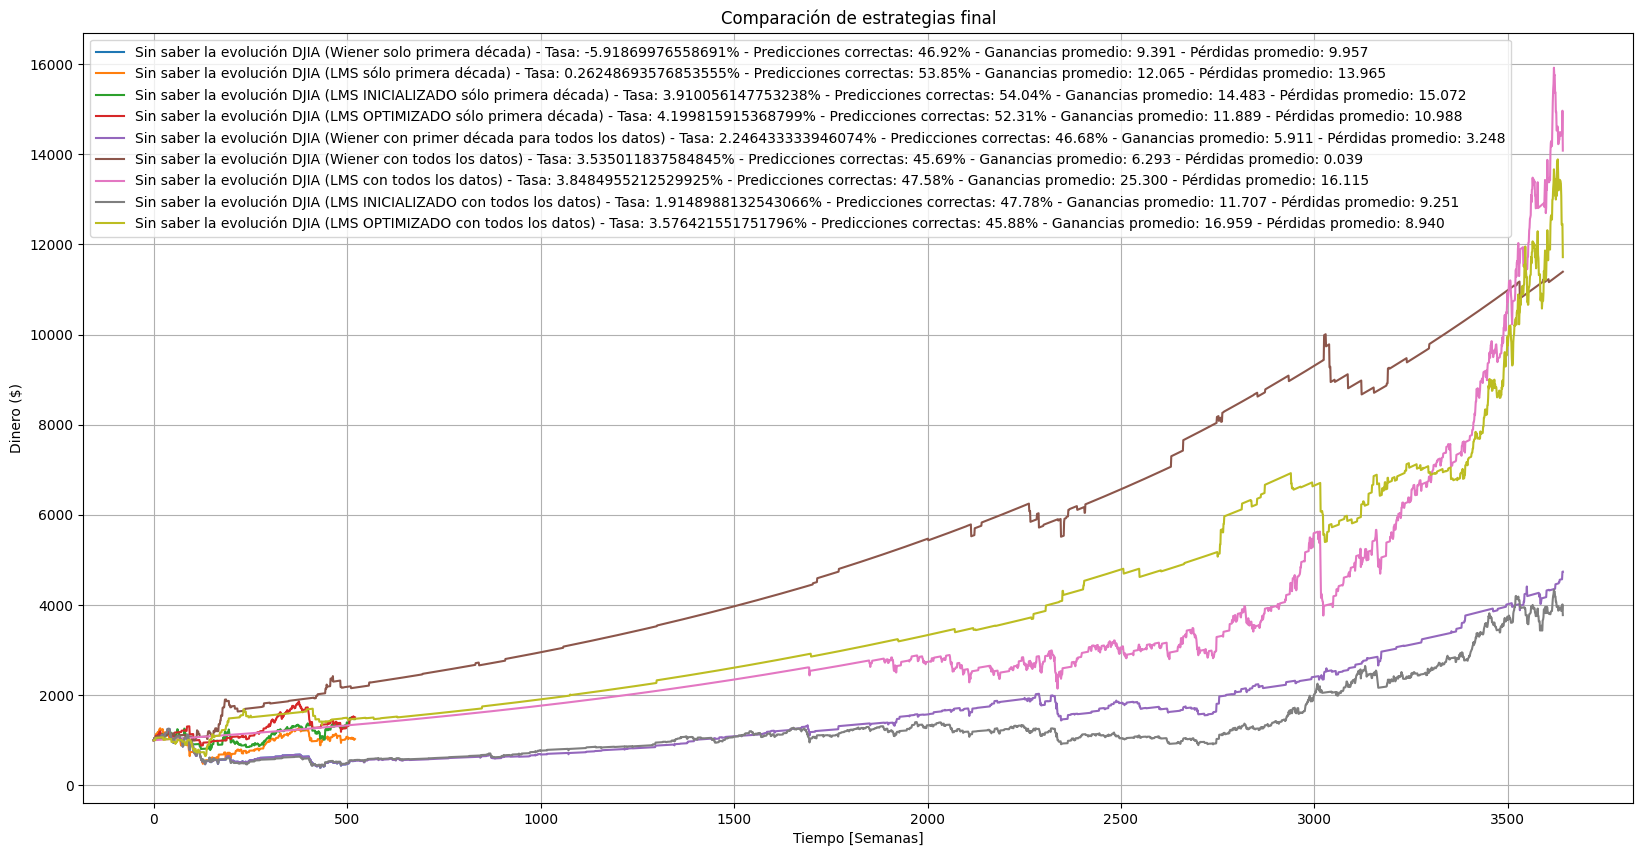

In [1733]:
plt.figure(figsize=(20,10))
plt.plot(dinero_estrategia_wiener,label=f"Sin saber la evolución DJIA (Wiener solo primera década) - Tasa: {tasa_equivalente_prediccion_anual_wiener*100}% - Predicciones correctas: {predicciones_correctas_wiener:.2f}% - Ganancias promedio: {ganancias_promedio_wiener:.3f} - Pérdidas promedio: {perdidas_promedio_wiener:.3f}")
plt.plot(dinero_estrategia_lms_decada,label=f"Sin saber la evolución DJIA (LMS sólo primera década) - Tasa: {tasa_equivalente_prediccion_anual_lms_decada*100}% - Predicciones correctas: {predicciones_correctas_lms:.2f}% - Ganancias promedio: {ganancias_promedio_lms:.3f} - Pérdidas promedio: {perdidas_promedio_lms:.3f}")
plt.plot(dinero_estrategia_lms_inicializado_decada,label=f"Sin saber la evolución DJIA (LMS INICIALIZADO sólo primera década) - Tasa: {tasa_equivalente_prediccion_anual_lms_inicializado_decada*100}% - Predicciones correctas: {predicciones_correctas_lms_inicializado:.2f}% - Ganancias promedio: {ganancias_promedio_lms_inicializado:.3f} - Pérdidas promedio: {perdidas_promedio_lms_inicializado:.3f}")
plt.plot(dinero_estrategia_lms_inicializado_optimizado_decada,label=f"Sin saber la evolución DJIA (LMS OPTIMIZADO sólo primera década) - Tasa: {tasa_equivalente_prediccion_anual_lms_inicializado_optimizado_decada*100}% - Predicciones correctas: {predicciones_correctas_lms_inicializado_optimizado:.2f}% - Ganancias promedio: {ganancias_promedio_lms_inicializado_optimizado:.3f} - Pérdidas promedio: {perdidas_promedio_lms_inicializado_optimizado:.3f}")
plt.plot(dinero_estrategia_wiener1_completo,label=f"Sin saber la evolución DJIA (Wiener con primer década para todos los datos) - Tasa: {tasa_equivalente_prediccion_anual_wiener1*100}% - Predicciones correctas: {predicciones_correctas_wiener1_completo:.2f}% - Ganancias promedio: {ganancias_promedio_wiener1_completo:.3f} - Pérdidas promedio: {perdidas_promedio_wiener1_completo:.3f}")
plt.plot(dinero_estrategia_wiener2_completo,label=f"Sin saber la evolución DJIA (Wiener con todos los datos) - Tasa: {tasa_equivalente_prediccion_anual_wiener2*100}% - Predicciones correctas: {predicciones_correctas_wiener2_completo:.2f}% - Ganancias promedio: {ganancias_promedio_wiener2_completo:.3f} - Pérdidas promedio: {perdidas_promedio_wiener2_completo:.3f}")
plt.plot(dinero_estrategia_lms_completo,label=f"Sin saber la evolución DJIA (LMS con todos los datos) - Tasa: {tasa_equivalente_prediccion_anual_lms_completo*100}% - Predicciones correctas: {predicciones_correctas_lms_completo:.2f}% - Ganancias promedio: {ganancias_promedio_lms_completo:.3f} - Pérdidas promedio: {perdidas_promedio_lms_completo:.3f}")
plt.plot(dinero_estrategia_lms_inicializado_completo,label=f"Sin saber la evolución DJIA (LMS INICIALIZADO con todos los datos) - Tasa: {tasa_equivalente_prediccion_anual_lms_inicializado_completo*100}% - Predicciones correctas: {predicciones_correctas_lms_inicializado_completo:.2f}% - Ganancias promedio: {ganancias_promedio_lms_inicializado_completo:.3f} - Pérdidas promedio: {perdidas_promedio_lms_inicializado_completo:.3f}")
plt.plot(dinero_estrategia_lms_inicializado_optimizado_completo,label=f"Sin saber la evolución DJIA (LMS OPTIMIZADO con todos los datos) - Tasa: {tasa_equivalente_prediccion_anual_lms_inicializado_optimizado_completo*100}% - Predicciones correctas: {predicciones_correctas_lms_inicializado_optimizado_completo:.2f}% - Ganancias promedio: {ganancias_promedio_lms_inicializado_optimizado_completo:.3f} - Pérdidas promedio: {perdidas_promedio_lms_inicializado_optimizado_completo:.3f}")

plt.xlabel("Tiempo [Semanas]")
plt.ylabel("Dinero ($)")
plt.title("Comparación de estrategias final")
plt.grid()
plt.legend()
plt.show()